In [1]:
# pip install huggingface_hub

In [1]:
# code
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
from skimage.color import label2rgb
from skimage.segmentation import watershed
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing
import os
import glob
import copy

In [3]:
Path = 'D:/lecture notes/lecture notes/Degree/Year 3/TRIM 2210/Visual Information Processing/Project/asl_alphabet_train/asl_alphabet_train'
filelist = os.listdir(Path)

In [4]:
print(filelist)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [138]:
# Create New Folder
# python program to check if a directory exists
path = "processed/"
for x in filelist:
    # Check whether the specified path exists or not
    isExist = os.path.exists(path+x)
    if not isExist:
        os.makedirs(path+x)
print()

In [15]:
path = "asl_alphabet_train/asl_alphabet_train/"
for file1 in filelist:
    img_number = 1
    if file1 == 'A' or file1 == 'B' or file1 == 'C' or file1 == 'D' or file1 == 'del' or file1 == 'E' or file1 == 'F' or file1 == 'nothing' or file1 == 'space':
        continue
    for file in glob.glob(path+file1+"/"+"*.*"):
        if img_number >= 2000:
            continue
        img = cv2.imread(file) 
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgRGB = imgRGB[5:-5, 5:-5]
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = img[5:-5, 5:-5]
        #plt.imshow(img,cmap='gray')
        
        blur = cv2.medianBlur(imgRGB,3)
        
        thrshld = 127
        img = blur
        is_light = np.mean(img) > thrshld
        if not is_light:
            new_img = np.zeros(blur.shape, blur.dtype)

            contrast = 3
            bright = 2

            for y in range(img.shape[0]):
                for x in range(img.shape[1]):
                    for c in range(img.shape[2]):
                        new_img[y,x,c]=np.clip(contrast*img[y,x,c]+bright, 0, 255)
        else:
            new_img = img

        img_conv = new_img.astype('float32')
        sm = cv2.blur(img_conv,(5,5))
        details = img_conv - sm;
        shp = img_conv + details;
        shp = np.clip(np.float32(shp),0,255)
        shp = shp.astype('uint8')

        imgGray = cv2.cvtColor(shp, cv2.COLOR_BGR2GRAY)
        
        cv2.imwrite("processed/"+ str(file1) + "/" + str(file1) + str(img_number) + ".jpg", imgGray)
        print("processed/"+ str(file1) + "/" + str(file1) + str(img_number) + ".jpg")
        img_number+=1
        #plt.imshow(imgGray,cmap='gray')

processed/G/G1.jpg
processed/G/G2.jpg
processed/G/G3.jpg
processed/G/G4.jpg
processed/G/G5.jpg
processed/G/G6.jpg
processed/G/G7.jpg
processed/G/G8.jpg
processed/G/G9.jpg
processed/G/G10.jpg
processed/G/G11.jpg
processed/G/G12.jpg
processed/G/G13.jpg
processed/G/G14.jpg
processed/G/G15.jpg
processed/G/G16.jpg
processed/G/G17.jpg
processed/G/G18.jpg
processed/G/G19.jpg
processed/G/G20.jpg
processed/G/G21.jpg
processed/G/G22.jpg
processed/G/G23.jpg
processed/G/G24.jpg
processed/G/G25.jpg
processed/G/G26.jpg
processed/G/G27.jpg
processed/G/G28.jpg
processed/G/G29.jpg
processed/G/G30.jpg
processed/G/G31.jpg
processed/G/G32.jpg
processed/G/G33.jpg
processed/G/G34.jpg
processed/G/G35.jpg
processed/G/G36.jpg
processed/G/G37.jpg
processed/G/G38.jpg
processed/G/G39.jpg
processed/G/G40.jpg
processed/G/G41.jpg
processed/G/G42.jpg
processed/G/G43.jpg
processed/G/G44.jpg
processed/G/G45.jpg
processed/G/G46.jpg
processed/G/G47.jpg
processed/G/G48.jpg
processed/G/G49.jpg
processed/G/G50.jpg
processed

processed/G/G402.jpg
processed/G/G403.jpg
processed/G/G404.jpg
processed/G/G405.jpg
processed/G/G406.jpg
processed/G/G407.jpg
processed/G/G408.jpg
processed/G/G409.jpg
processed/G/G410.jpg
processed/G/G411.jpg
processed/G/G412.jpg
processed/G/G413.jpg
processed/G/G414.jpg
processed/G/G415.jpg
processed/G/G416.jpg
processed/G/G417.jpg
processed/G/G418.jpg
processed/G/G419.jpg
processed/G/G420.jpg
processed/G/G421.jpg
processed/G/G422.jpg
processed/G/G423.jpg
processed/G/G424.jpg
processed/G/G425.jpg
processed/G/G426.jpg
processed/G/G427.jpg
processed/G/G428.jpg
processed/G/G429.jpg
processed/G/G430.jpg
processed/G/G431.jpg
processed/G/G432.jpg
processed/G/G433.jpg
processed/G/G434.jpg
processed/G/G435.jpg
processed/G/G436.jpg
processed/G/G437.jpg
processed/G/G438.jpg
processed/G/G439.jpg
processed/G/G440.jpg
processed/G/G441.jpg
processed/G/G442.jpg
processed/G/G443.jpg
processed/G/G444.jpg
processed/G/G445.jpg
processed/G/G446.jpg
processed/G/G447.jpg
processed/G/G448.jpg
processed/G/G

processed/G/G802.jpg
processed/G/G803.jpg
processed/G/G804.jpg
processed/G/G805.jpg
processed/G/G806.jpg
processed/G/G807.jpg
processed/G/G808.jpg
processed/G/G809.jpg
processed/G/G810.jpg
processed/G/G811.jpg
processed/G/G812.jpg
processed/G/G813.jpg
processed/G/G814.jpg
processed/G/G815.jpg
processed/G/G816.jpg
processed/G/G817.jpg
processed/G/G818.jpg
processed/G/G819.jpg
processed/G/G820.jpg
processed/G/G821.jpg
processed/G/G822.jpg
processed/G/G823.jpg
processed/G/G824.jpg
processed/G/G825.jpg
processed/G/G826.jpg
processed/G/G827.jpg
processed/G/G828.jpg
processed/G/G829.jpg
processed/G/G830.jpg
processed/G/G831.jpg
processed/G/G832.jpg
processed/G/G833.jpg
processed/G/G834.jpg
processed/G/G835.jpg
processed/G/G836.jpg
processed/G/G837.jpg
processed/G/G838.jpg
processed/G/G839.jpg
processed/G/G840.jpg
processed/G/G841.jpg
processed/G/G842.jpg
processed/G/G843.jpg
processed/G/G844.jpg
processed/G/G845.jpg
processed/G/G846.jpg
processed/G/G847.jpg
processed/G/G848.jpg
processed/G/G

processed/G/G1184.jpg
processed/G/G1185.jpg
processed/G/G1186.jpg
processed/G/G1187.jpg
processed/G/G1188.jpg
processed/G/G1189.jpg
processed/G/G1190.jpg
processed/G/G1191.jpg
processed/G/G1192.jpg
processed/G/G1193.jpg
processed/G/G1194.jpg
processed/G/G1195.jpg
processed/G/G1196.jpg
processed/G/G1197.jpg
processed/G/G1198.jpg
processed/G/G1199.jpg
processed/G/G1200.jpg
processed/G/G1201.jpg
processed/G/G1202.jpg
processed/G/G1203.jpg
processed/G/G1204.jpg
processed/G/G1205.jpg
processed/G/G1206.jpg
processed/G/G1207.jpg
processed/G/G1208.jpg
processed/G/G1209.jpg
processed/G/G1210.jpg
processed/G/G1211.jpg
processed/G/G1212.jpg
processed/G/G1213.jpg
processed/G/G1214.jpg
processed/G/G1215.jpg
processed/G/G1216.jpg
processed/G/G1217.jpg
processed/G/G1218.jpg
processed/G/G1219.jpg
processed/G/G1220.jpg
processed/G/G1221.jpg
processed/G/G1222.jpg
processed/G/G1223.jpg
processed/G/G1224.jpg
processed/G/G1225.jpg
processed/G/G1226.jpg
processed/G/G1227.jpg
processed/G/G1228.jpg
processed/

processed/G/G1557.jpg
processed/G/G1558.jpg
processed/G/G1559.jpg
processed/G/G1560.jpg
processed/G/G1561.jpg
processed/G/G1562.jpg
processed/G/G1563.jpg
processed/G/G1564.jpg
processed/G/G1565.jpg
processed/G/G1566.jpg
processed/G/G1567.jpg
processed/G/G1568.jpg
processed/G/G1569.jpg
processed/G/G1570.jpg
processed/G/G1571.jpg
processed/G/G1572.jpg
processed/G/G1573.jpg
processed/G/G1574.jpg
processed/G/G1575.jpg
processed/G/G1576.jpg
processed/G/G1577.jpg
processed/G/G1578.jpg
processed/G/G1579.jpg
processed/G/G1580.jpg
processed/G/G1581.jpg
processed/G/G1582.jpg
processed/G/G1583.jpg
processed/G/G1584.jpg
processed/G/G1585.jpg
processed/G/G1586.jpg
processed/G/G1587.jpg
processed/G/G1588.jpg
processed/G/G1589.jpg
processed/G/G1590.jpg
processed/G/G1591.jpg
processed/G/G1592.jpg
processed/G/G1593.jpg
processed/G/G1594.jpg
processed/G/G1595.jpg
processed/G/G1596.jpg
processed/G/G1597.jpg
processed/G/G1598.jpg
processed/G/G1599.jpg
processed/G/G1600.jpg
processed/G/G1601.jpg
processed/

processed/G/G1930.jpg
processed/G/G1931.jpg
processed/G/G1932.jpg
processed/G/G1933.jpg
processed/G/G1934.jpg
processed/G/G1935.jpg
processed/G/G1936.jpg
processed/G/G1937.jpg
processed/G/G1938.jpg
processed/G/G1939.jpg
processed/G/G1940.jpg
processed/G/G1941.jpg
processed/G/G1942.jpg
processed/G/G1943.jpg
processed/G/G1944.jpg
processed/G/G1945.jpg
processed/G/G1946.jpg
processed/G/G1947.jpg
processed/G/G1948.jpg
processed/G/G1949.jpg
processed/G/G1950.jpg
processed/G/G1951.jpg
processed/G/G1952.jpg
processed/G/G1953.jpg
processed/G/G1954.jpg
processed/G/G1955.jpg
processed/G/G1956.jpg
processed/G/G1957.jpg
processed/G/G1958.jpg
processed/G/G1959.jpg
processed/G/G1960.jpg
processed/G/G1961.jpg
processed/G/G1962.jpg
processed/G/G1963.jpg
processed/G/G1964.jpg
processed/G/G1965.jpg
processed/G/G1966.jpg
processed/G/G1967.jpg
processed/G/G1968.jpg
processed/G/G1969.jpg
processed/G/G1970.jpg
processed/G/G1971.jpg
processed/G/G1972.jpg
processed/G/G1973.jpg
processed/G/G1974.jpg
processed/

processed/H/H324.jpg
processed/H/H325.jpg
processed/H/H326.jpg
processed/H/H327.jpg
processed/H/H328.jpg
processed/H/H329.jpg
processed/H/H330.jpg
processed/H/H331.jpg
processed/H/H332.jpg
processed/H/H333.jpg
processed/H/H334.jpg
processed/H/H335.jpg
processed/H/H336.jpg
processed/H/H337.jpg
processed/H/H338.jpg
processed/H/H339.jpg
processed/H/H340.jpg
processed/H/H341.jpg
processed/H/H342.jpg
processed/H/H343.jpg
processed/H/H344.jpg
processed/H/H345.jpg
processed/H/H346.jpg
processed/H/H347.jpg
processed/H/H348.jpg
processed/H/H349.jpg
processed/H/H350.jpg
processed/H/H351.jpg
processed/H/H352.jpg
processed/H/H353.jpg
processed/H/H354.jpg
processed/H/H355.jpg
processed/H/H356.jpg
processed/H/H357.jpg
processed/H/H358.jpg
processed/H/H359.jpg
processed/H/H360.jpg
processed/H/H361.jpg
processed/H/H362.jpg
processed/H/H363.jpg
processed/H/H364.jpg
processed/H/H365.jpg
processed/H/H366.jpg
processed/H/H367.jpg
processed/H/H368.jpg
processed/H/H369.jpg
processed/H/H370.jpg
processed/H/H

processed/H/H724.jpg
processed/H/H725.jpg
processed/H/H726.jpg
processed/H/H727.jpg
processed/H/H728.jpg
processed/H/H729.jpg
processed/H/H730.jpg
processed/H/H731.jpg
processed/H/H732.jpg
processed/H/H733.jpg
processed/H/H734.jpg
processed/H/H735.jpg
processed/H/H736.jpg
processed/H/H737.jpg
processed/H/H738.jpg
processed/H/H739.jpg
processed/H/H740.jpg
processed/H/H741.jpg
processed/H/H742.jpg
processed/H/H743.jpg
processed/H/H744.jpg
processed/H/H745.jpg
processed/H/H746.jpg
processed/H/H747.jpg
processed/H/H748.jpg
processed/H/H749.jpg
processed/H/H750.jpg
processed/H/H751.jpg
processed/H/H752.jpg
processed/H/H753.jpg
processed/H/H754.jpg
processed/H/H755.jpg
processed/H/H756.jpg
processed/H/H757.jpg
processed/H/H758.jpg
processed/H/H759.jpg
processed/H/H760.jpg
processed/H/H761.jpg
processed/H/H762.jpg
processed/H/H763.jpg
processed/H/H764.jpg
processed/H/H765.jpg
processed/H/H766.jpg
processed/H/H767.jpg
processed/H/H768.jpg
processed/H/H769.jpg
processed/H/H770.jpg
processed/H/H

processed/H/H1112.jpg
processed/H/H1113.jpg
processed/H/H1114.jpg
processed/H/H1115.jpg
processed/H/H1116.jpg
processed/H/H1117.jpg
processed/H/H1118.jpg
processed/H/H1119.jpg
processed/H/H1120.jpg
processed/H/H1121.jpg
processed/H/H1122.jpg
processed/H/H1123.jpg
processed/H/H1124.jpg
processed/H/H1125.jpg
processed/H/H1126.jpg
processed/H/H1127.jpg
processed/H/H1128.jpg
processed/H/H1129.jpg
processed/H/H1130.jpg
processed/H/H1131.jpg
processed/H/H1132.jpg
processed/H/H1133.jpg
processed/H/H1134.jpg
processed/H/H1135.jpg
processed/H/H1136.jpg
processed/H/H1137.jpg
processed/H/H1138.jpg
processed/H/H1139.jpg
processed/H/H1140.jpg
processed/H/H1141.jpg
processed/H/H1142.jpg
processed/H/H1143.jpg
processed/H/H1144.jpg
processed/H/H1145.jpg
processed/H/H1146.jpg
processed/H/H1147.jpg
processed/H/H1148.jpg
processed/H/H1149.jpg
processed/H/H1150.jpg
processed/H/H1151.jpg
processed/H/H1152.jpg
processed/H/H1153.jpg
processed/H/H1154.jpg
processed/H/H1155.jpg
processed/H/H1156.jpg
processed/

processed/H/H1485.jpg
processed/H/H1486.jpg
processed/H/H1487.jpg
processed/H/H1488.jpg
processed/H/H1489.jpg
processed/H/H1490.jpg
processed/H/H1491.jpg
processed/H/H1492.jpg
processed/H/H1493.jpg
processed/H/H1494.jpg
processed/H/H1495.jpg
processed/H/H1496.jpg
processed/H/H1497.jpg
processed/H/H1498.jpg
processed/H/H1499.jpg
processed/H/H1500.jpg
processed/H/H1501.jpg
processed/H/H1502.jpg
processed/H/H1503.jpg
processed/H/H1504.jpg
processed/H/H1505.jpg
processed/H/H1506.jpg
processed/H/H1507.jpg
processed/H/H1508.jpg
processed/H/H1509.jpg
processed/H/H1510.jpg
processed/H/H1511.jpg
processed/H/H1512.jpg
processed/H/H1513.jpg
processed/H/H1514.jpg
processed/H/H1515.jpg
processed/H/H1516.jpg
processed/H/H1517.jpg
processed/H/H1518.jpg
processed/H/H1519.jpg
processed/H/H1520.jpg
processed/H/H1521.jpg
processed/H/H1522.jpg
processed/H/H1523.jpg
processed/H/H1524.jpg
processed/H/H1525.jpg
processed/H/H1526.jpg
processed/H/H1527.jpg
processed/H/H1528.jpg
processed/H/H1529.jpg
processed/

processed/H/H1858.jpg
processed/H/H1859.jpg
processed/H/H1860.jpg
processed/H/H1861.jpg
processed/H/H1862.jpg
processed/H/H1863.jpg
processed/H/H1864.jpg
processed/H/H1865.jpg
processed/H/H1866.jpg
processed/H/H1867.jpg
processed/H/H1868.jpg
processed/H/H1869.jpg
processed/H/H1870.jpg
processed/H/H1871.jpg
processed/H/H1872.jpg
processed/H/H1873.jpg
processed/H/H1874.jpg
processed/H/H1875.jpg
processed/H/H1876.jpg
processed/H/H1877.jpg
processed/H/H1878.jpg
processed/H/H1879.jpg
processed/H/H1880.jpg
processed/H/H1881.jpg
processed/H/H1882.jpg
processed/H/H1883.jpg
processed/H/H1884.jpg
processed/H/H1885.jpg
processed/H/H1886.jpg
processed/H/H1887.jpg
processed/H/H1888.jpg
processed/H/H1889.jpg
processed/H/H1890.jpg
processed/H/H1891.jpg
processed/H/H1892.jpg
processed/H/H1893.jpg
processed/H/H1894.jpg
processed/H/H1895.jpg
processed/H/H1896.jpg
processed/H/H1897.jpg
processed/H/H1898.jpg
processed/H/H1899.jpg
processed/H/H1900.jpg
processed/H/H1901.jpg
processed/H/H1902.jpg
processed/

processed/I/I254.jpg
processed/I/I255.jpg
processed/I/I256.jpg
processed/I/I257.jpg
processed/I/I258.jpg
processed/I/I259.jpg
processed/I/I260.jpg
processed/I/I261.jpg
processed/I/I262.jpg
processed/I/I263.jpg
processed/I/I264.jpg
processed/I/I265.jpg
processed/I/I266.jpg
processed/I/I267.jpg
processed/I/I268.jpg
processed/I/I269.jpg
processed/I/I270.jpg
processed/I/I271.jpg
processed/I/I272.jpg
processed/I/I273.jpg
processed/I/I274.jpg
processed/I/I275.jpg
processed/I/I276.jpg
processed/I/I277.jpg
processed/I/I278.jpg
processed/I/I279.jpg
processed/I/I280.jpg
processed/I/I281.jpg
processed/I/I282.jpg
processed/I/I283.jpg
processed/I/I284.jpg
processed/I/I285.jpg
processed/I/I286.jpg
processed/I/I287.jpg
processed/I/I288.jpg
processed/I/I289.jpg
processed/I/I290.jpg
processed/I/I291.jpg
processed/I/I292.jpg
processed/I/I293.jpg
processed/I/I294.jpg
processed/I/I295.jpg
processed/I/I296.jpg
processed/I/I297.jpg
processed/I/I298.jpg
processed/I/I299.jpg
processed/I/I300.jpg
processed/I/I

processed/I/I647.jpg
processed/I/I648.jpg
processed/I/I649.jpg
processed/I/I650.jpg
processed/I/I651.jpg
processed/I/I652.jpg
processed/I/I653.jpg
processed/I/I654.jpg
processed/I/I655.jpg
processed/I/I656.jpg
processed/I/I657.jpg
processed/I/I658.jpg
processed/I/I659.jpg
processed/I/I660.jpg
processed/I/I661.jpg
processed/I/I662.jpg
processed/I/I663.jpg
processed/I/I664.jpg
processed/I/I665.jpg
processed/I/I666.jpg
processed/I/I667.jpg
processed/I/I668.jpg
processed/I/I669.jpg
processed/I/I670.jpg
processed/I/I671.jpg
processed/I/I672.jpg
processed/I/I673.jpg
processed/I/I674.jpg
processed/I/I675.jpg
processed/I/I676.jpg
processed/I/I677.jpg
processed/I/I678.jpg
processed/I/I679.jpg
processed/I/I680.jpg
processed/I/I681.jpg
processed/I/I682.jpg
processed/I/I683.jpg
processed/I/I684.jpg
processed/I/I685.jpg
processed/I/I686.jpg
processed/I/I687.jpg
processed/I/I688.jpg
processed/I/I689.jpg
processed/I/I690.jpg
processed/I/I691.jpg
processed/I/I692.jpg
processed/I/I693.jpg
processed/I/I

processed/I/I1040.jpg
processed/I/I1041.jpg
processed/I/I1042.jpg
processed/I/I1043.jpg
processed/I/I1044.jpg
processed/I/I1045.jpg
processed/I/I1046.jpg
processed/I/I1047.jpg
processed/I/I1048.jpg
processed/I/I1049.jpg
processed/I/I1050.jpg
processed/I/I1051.jpg
processed/I/I1052.jpg
processed/I/I1053.jpg
processed/I/I1054.jpg
processed/I/I1055.jpg
processed/I/I1056.jpg
processed/I/I1057.jpg
processed/I/I1058.jpg
processed/I/I1059.jpg
processed/I/I1060.jpg
processed/I/I1061.jpg
processed/I/I1062.jpg
processed/I/I1063.jpg
processed/I/I1064.jpg
processed/I/I1065.jpg
processed/I/I1066.jpg
processed/I/I1067.jpg
processed/I/I1068.jpg
processed/I/I1069.jpg
processed/I/I1070.jpg
processed/I/I1071.jpg
processed/I/I1072.jpg
processed/I/I1073.jpg
processed/I/I1074.jpg
processed/I/I1075.jpg
processed/I/I1076.jpg
processed/I/I1077.jpg
processed/I/I1078.jpg
processed/I/I1079.jpg
processed/I/I1080.jpg
processed/I/I1081.jpg
processed/I/I1082.jpg
processed/I/I1083.jpg
processed/I/I1084.jpg
processed/

processed/I/I1414.jpg
processed/I/I1415.jpg
processed/I/I1416.jpg
processed/I/I1417.jpg
processed/I/I1418.jpg
processed/I/I1419.jpg
processed/I/I1420.jpg
processed/I/I1421.jpg
processed/I/I1422.jpg
processed/I/I1423.jpg
processed/I/I1424.jpg
processed/I/I1425.jpg
processed/I/I1426.jpg
processed/I/I1427.jpg
processed/I/I1428.jpg
processed/I/I1429.jpg
processed/I/I1430.jpg
processed/I/I1431.jpg
processed/I/I1432.jpg
processed/I/I1433.jpg
processed/I/I1434.jpg
processed/I/I1435.jpg
processed/I/I1436.jpg
processed/I/I1437.jpg
processed/I/I1438.jpg
processed/I/I1439.jpg
processed/I/I1440.jpg
processed/I/I1441.jpg
processed/I/I1442.jpg
processed/I/I1443.jpg
processed/I/I1444.jpg
processed/I/I1445.jpg
processed/I/I1446.jpg
processed/I/I1447.jpg
processed/I/I1448.jpg
processed/I/I1449.jpg
processed/I/I1450.jpg
processed/I/I1451.jpg
processed/I/I1452.jpg
processed/I/I1453.jpg
processed/I/I1454.jpg
processed/I/I1455.jpg
processed/I/I1456.jpg
processed/I/I1457.jpg
processed/I/I1458.jpg
processed/

processed/I/I1798.jpg
processed/I/I1799.jpg
processed/I/I1800.jpg
processed/I/I1801.jpg
processed/I/I1802.jpg
processed/I/I1803.jpg
processed/I/I1804.jpg
processed/I/I1805.jpg
processed/I/I1806.jpg
processed/I/I1807.jpg
processed/I/I1808.jpg
processed/I/I1809.jpg
processed/I/I1810.jpg
processed/I/I1811.jpg
processed/I/I1812.jpg
processed/I/I1813.jpg
processed/I/I1814.jpg
processed/I/I1815.jpg
processed/I/I1816.jpg
processed/I/I1817.jpg
processed/I/I1818.jpg
processed/I/I1819.jpg
processed/I/I1820.jpg
processed/I/I1821.jpg
processed/I/I1822.jpg
processed/I/I1823.jpg
processed/I/I1824.jpg
processed/I/I1825.jpg
processed/I/I1826.jpg
processed/I/I1827.jpg
processed/I/I1828.jpg
processed/I/I1829.jpg
processed/I/I1830.jpg
processed/I/I1831.jpg
processed/I/I1832.jpg
processed/I/I1833.jpg
processed/I/I1834.jpg
processed/I/I1835.jpg
processed/I/I1836.jpg
processed/I/I1837.jpg
processed/I/I1838.jpg
processed/I/I1839.jpg
processed/I/I1840.jpg
processed/I/I1841.jpg
processed/I/I1842.jpg
processed/

processed/J/J187.jpg
processed/J/J188.jpg
processed/J/J189.jpg
processed/J/J190.jpg
processed/J/J191.jpg
processed/J/J192.jpg
processed/J/J193.jpg
processed/J/J194.jpg
processed/J/J195.jpg
processed/J/J196.jpg
processed/J/J197.jpg
processed/J/J198.jpg
processed/J/J199.jpg
processed/J/J200.jpg
processed/J/J201.jpg
processed/J/J202.jpg
processed/J/J203.jpg
processed/J/J204.jpg
processed/J/J205.jpg
processed/J/J206.jpg
processed/J/J207.jpg
processed/J/J208.jpg
processed/J/J209.jpg
processed/J/J210.jpg
processed/J/J211.jpg
processed/J/J212.jpg
processed/J/J213.jpg
processed/J/J214.jpg
processed/J/J215.jpg
processed/J/J216.jpg
processed/J/J217.jpg
processed/J/J218.jpg
processed/J/J219.jpg
processed/J/J220.jpg
processed/J/J221.jpg
processed/J/J222.jpg
processed/J/J223.jpg
processed/J/J224.jpg
processed/J/J225.jpg
processed/J/J226.jpg
processed/J/J227.jpg
processed/J/J228.jpg
processed/J/J229.jpg
processed/J/J230.jpg
processed/J/J231.jpg
processed/J/J232.jpg
processed/J/J233.jpg
processed/J/J

processed/J/J580.jpg
processed/J/J581.jpg
processed/J/J582.jpg
processed/J/J583.jpg
processed/J/J584.jpg
processed/J/J585.jpg
processed/J/J586.jpg
processed/J/J587.jpg
processed/J/J588.jpg
processed/J/J589.jpg
processed/J/J590.jpg
processed/J/J591.jpg
processed/J/J592.jpg
processed/J/J593.jpg
processed/J/J594.jpg
processed/J/J595.jpg
processed/J/J596.jpg
processed/J/J597.jpg
processed/J/J598.jpg
processed/J/J599.jpg
processed/J/J600.jpg
processed/J/J601.jpg
processed/J/J602.jpg
processed/J/J603.jpg
processed/J/J604.jpg
processed/J/J605.jpg
processed/J/J606.jpg
processed/J/J607.jpg
processed/J/J608.jpg
processed/J/J609.jpg
processed/J/J610.jpg
processed/J/J611.jpg
processed/J/J612.jpg
processed/J/J613.jpg
processed/J/J614.jpg
processed/J/J615.jpg
processed/J/J616.jpg
processed/J/J617.jpg
processed/J/J618.jpg
processed/J/J619.jpg
processed/J/J620.jpg
processed/J/J621.jpg
processed/J/J622.jpg
processed/J/J623.jpg
processed/J/J624.jpg
processed/J/J625.jpg
processed/J/J626.jpg
processed/J/J

processed/J/J979.jpg
processed/J/J980.jpg
processed/J/J981.jpg
processed/J/J982.jpg
processed/J/J983.jpg
processed/J/J984.jpg
processed/J/J985.jpg
processed/J/J986.jpg
processed/J/J987.jpg
processed/J/J988.jpg
processed/J/J989.jpg
processed/J/J990.jpg
processed/J/J991.jpg
processed/J/J992.jpg
processed/J/J993.jpg
processed/J/J994.jpg
processed/J/J995.jpg
processed/J/J996.jpg
processed/J/J997.jpg
processed/J/J998.jpg
processed/J/J999.jpg
processed/J/J1000.jpg
processed/J/J1001.jpg
processed/J/J1002.jpg
processed/J/J1003.jpg
processed/J/J1004.jpg
processed/J/J1005.jpg
processed/J/J1006.jpg
processed/J/J1007.jpg
processed/J/J1008.jpg
processed/J/J1009.jpg
processed/J/J1010.jpg
processed/J/J1011.jpg
processed/J/J1012.jpg
processed/J/J1013.jpg
processed/J/J1014.jpg
processed/J/J1015.jpg
processed/J/J1016.jpg
processed/J/J1017.jpg
processed/J/J1018.jpg
processed/J/J1019.jpg
processed/J/J1020.jpg
processed/J/J1021.jpg
processed/J/J1022.jpg
processed/J/J1023.jpg
processed/J/J1024.jpg
processed

processed/J/J1353.jpg
processed/J/J1354.jpg
processed/J/J1355.jpg
processed/J/J1356.jpg
processed/J/J1357.jpg
processed/J/J1358.jpg
processed/J/J1359.jpg
processed/J/J1360.jpg
processed/J/J1361.jpg
processed/J/J1362.jpg
processed/J/J1363.jpg
processed/J/J1364.jpg
processed/J/J1365.jpg
processed/J/J1366.jpg
processed/J/J1367.jpg
processed/J/J1368.jpg
processed/J/J1369.jpg
processed/J/J1370.jpg
processed/J/J1371.jpg
processed/J/J1372.jpg
processed/J/J1373.jpg
processed/J/J1374.jpg
processed/J/J1375.jpg
processed/J/J1376.jpg
processed/J/J1377.jpg
processed/J/J1378.jpg
processed/J/J1379.jpg
processed/J/J1380.jpg
processed/J/J1381.jpg
processed/J/J1382.jpg
processed/J/J1383.jpg
processed/J/J1384.jpg
processed/J/J1385.jpg
processed/J/J1386.jpg
processed/J/J1387.jpg
processed/J/J1388.jpg
processed/J/J1389.jpg
processed/J/J1390.jpg
processed/J/J1391.jpg
processed/J/J1392.jpg
processed/J/J1393.jpg
processed/J/J1394.jpg
processed/J/J1395.jpg
processed/J/J1396.jpg
processed/J/J1397.jpg
processed/

processed/J/J1726.jpg
processed/J/J1727.jpg
processed/J/J1728.jpg
processed/J/J1729.jpg
processed/J/J1730.jpg
processed/J/J1731.jpg
processed/J/J1732.jpg
processed/J/J1733.jpg
processed/J/J1734.jpg
processed/J/J1735.jpg
processed/J/J1736.jpg
processed/J/J1737.jpg
processed/J/J1738.jpg
processed/J/J1739.jpg
processed/J/J1740.jpg
processed/J/J1741.jpg
processed/J/J1742.jpg
processed/J/J1743.jpg
processed/J/J1744.jpg
processed/J/J1745.jpg
processed/J/J1746.jpg
processed/J/J1747.jpg
processed/J/J1748.jpg
processed/J/J1749.jpg
processed/J/J1750.jpg
processed/J/J1751.jpg
processed/J/J1752.jpg
processed/J/J1753.jpg
processed/J/J1754.jpg
processed/J/J1755.jpg
processed/J/J1756.jpg
processed/J/J1757.jpg
processed/J/J1758.jpg
processed/J/J1759.jpg
processed/J/J1760.jpg
processed/J/J1761.jpg
processed/J/J1762.jpg
processed/J/J1763.jpg
processed/J/J1764.jpg
processed/J/J1765.jpg
processed/J/J1766.jpg
processed/J/J1767.jpg
processed/J/J1768.jpg
processed/J/J1769.jpg
processed/J/J1770.jpg
processed/

processed/K/K113.jpg
processed/K/K114.jpg
processed/K/K115.jpg
processed/K/K116.jpg
processed/K/K117.jpg
processed/K/K118.jpg
processed/K/K119.jpg
processed/K/K120.jpg
processed/K/K121.jpg
processed/K/K122.jpg
processed/K/K123.jpg
processed/K/K124.jpg
processed/K/K125.jpg
processed/K/K126.jpg
processed/K/K127.jpg
processed/K/K128.jpg
processed/K/K129.jpg
processed/K/K130.jpg
processed/K/K131.jpg
processed/K/K132.jpg
processed/K/K133.jpg
processed/K/K134.jpg
processed/K/K135.jpg
processed/K/K136.jpg
processed/K/K137.jpg
processed/K/K138.jpg
processed/K/K139.jpg
processed/K/K140.jpg
processed/K/K141.jpg
processed/K/K142.jpg
processed/K/K143.jpg
processed/K/K144.jpg
processed/K/K145.jpg
processed/K/K146.jpg
processed/K/K147.jpg
processed/K/K148.jpg
processed/K/K149.jpg
processed/K/K150.jpg
processed/K/K151.jpg
processed/K/K152.jpg
processed/K/K153.jpg
processed/K/K154.jpg
processed/K/K155.jpg
processed/K/K156.jpg
processed/K/K157.jpg
processed/K/K158.jpg
processed/K/K159.jpg
processed/K/K

processed/K/K513.jpg
processed/K/K514.jpg
processed/K/K515.jpg
processed/K/K516.jpg
processed/K/K517.jpg
processed/K/K518.jpg
processed/K/K519.jpg
processed/K/K520.jpg
processed/K/K521.jpg
processed/K/K522.jpg
processed/K/K523.jpg
processed/K/K524.jpg
processed/K/K525.jpg
processed/K/K526.jpg
processed/K/K527.jpg
processed/K/K528.jpg
processed/K/K529.jpg
processed/K/K530.jpg
processed/K/K531.jpg
processed/K/K532.jpg
processed/K/K533.jpg
processed/K/K534.jpg
processed/K/K535.jpg
processed/K/K536.jpg
processed/K/K537.jpg
processed/K/K538.jpg
processed/K/K539.jpg
processed/K/K540.jpg
processed/K/K541.jpg
processed/K/K542.jpg
processed/K/K543.jpg
processed/K/K544.jpg
processed/K/K545.jpg
processed/K/K546.jpg
processed/K/K547.jpg
processed/K/K548.jpg
processed/K/K549.jpg
processed/K/K550.jpg
processed/K/K551.jpg
processed/K/K552.jpg
processed/K/K553.jpg
processed/K/K554.jpg
processed/K/K555.jpg
processed/K/K556.jpg
processed/K/K557.jpg
processed/K/K558.jpg
processed/K/K559.jpg
processed/K/K

processed/K/K913.jpg
processed/K/K914.jpg
processed/K/K915.jpg
processed/K/K916.jpg
processed/K/K917.jpg
processed/K/K918.jpg
processed/K/K919.jpg
processed/K/K920.jpg
processed/K/K921.jpg
processed/K/K922.jpg
processed/K/K923.jpg
processed/K/K924.jpg
processed/K/K925.jpg
processed/K/K926.jpg
processed/K/K927.jpg
processed/K/K928.jpg
processed/K/K929.jpg
processed/K/K930.jpg
processed/K/K931.jpg
processed/K/K932.jpg
processed/K/K933.jpg
processed/K/K934.jpg
processed/K/K935.jpg
processed/K/K936.jpg
processed/K/K937.jpg
processed/K/K938.jpg
processed/K/K939.jpg
processed/K/K940.jpg
processed/K/K941.jpg
processed/K/K942.jpg
processed/K/K943.jpg
processed/K/K944.jpg
processed/K/K945.jpg
processed/K/K946.jpg
processed/K/K947.jpg
processed/K/K948.jpg
processed/K/K949.jpg
processed/K/K950.jpg
processed/K/K951.jpg
processed/K/K952.jpg
processed/K/K953.jpg
processed/K/K954.jpg
processed/K/K955.jpg
processed/K/K956.jpg
processed/K/K957.jpg
processed/K/K958.jpg
processed/K/K959.jpg
processed/K/K

processed/K/K1290.jpg
processed/K/K1291.jpg
processed/K/K1292.jpg
processed/K/K1293.jpg
processed/K/K1294.jpg
processed/K/K1295.jpg
processed/K/K1296.jpg
processed/K/K1297.jpg
processed/K/K1298.jpg
processed/K/K1299.jpg
processed/K/K1300.jpg
processed/K/K1301.jpg
processed/K/K1302.jpg
processed/K/K1303.jpg
processed/K/K1304.jpg
processed/K/K1305.jpg
processed/K/K1306.jpg
processed/K/K1307.jpg
processed/K/K1308.jpg
processed/K/K1309.jpg
processed/K/K1310.jpg
processed/K/K1311.jpg
processed/K/K1312.jpg
processed/K/K1313.jpg
processed/K/K1314.jpg
processed/K/K1315.jpg
processed/K/K1316.jpg
processed/K/K1317.jpg
processed/K/K1318.jpg
processed/K/K1319.jpg
processed/K/K1320.jpg
processed/K/K1321.jpg
processed/K/K1322.jpg
processed/K/K1323.jpg
processed/K/K1324.jpg
processed/K/K1325.jpg
processed/K/K1326.jpg
processed/K/K1327.jpg
processed/K/K1328.jpg
processed/K/K1329.jpg
processed/K/K1330.jpg
processed/K/K1331.jpg
processed/K/K1332.jpg
processed/K/K1333.jpg
processed/K/K1334.jpg
processed/

processed/K/K1663.jpg
processed/K/K1664.jpg
processed/K/K1665.jpg
processed/K/K1666.jpg
processed/K/K1667.jpg
processed/K/K1668.jpg
processed/K/K1669.jpg
processed/K/K1670.jpg
processed/K/K1671.jpg
processed/K/K1672.jpg
processed/K/K1673.jpg
processed/K/K1674.jpg
processed/K/K1675.jpg
processed/K/K1676.jpg
processed/K/K1677.jpg
processed/K/K1678.jpg
processed/K/K1679.jpg
processed/K/K1680.jpg
processed/K/K1681.jpg
processed/K/K1682.jpg
processed/K/K1683.jpg
processed/K/K1684.jpg
processed/K/K1685.jpg
processed/K/K1686.jpg
processed/K/K1687.jpg
processed/K/K1688.jpg
processed/K/K1689.jpg
processed/K/K1690.jpg
processed/K/K1691.jpg
processed/K/K1692.jpg
processed/K/K1693.jpg
processed/K/K1694.jpg
processed/K/K1695.jpg
processed/K/K1696.jpg
processed/K/K1697.jpg
processed/K/K1698.jpg
processed/K/K1699.jpg
processed/K/K1700.jpg
processed/K/K1701.jpg
processed/K/K1702.jpg
processed/K/K1703.jpg
processed/K/K1704.jpg
processed/K/K1705.jpg
processed/K/K1706.jpg
processed/K/K1707.jpg
processed/

processed/L/L55.jpg
processed/L/L56.jpg
processed/L/L57.jpg
processed/L/L58.jpg
processed/L/L59.jpg
processed/L/L60.jpg
processed/L/L61.jpg
processed/L/L62.jpg
processed/L/L63.jpg
processed/L/L64.jpg
processed/L/L65.jpg
processed/L/L66.jpg
processed/L/L67.jpg
processed/L/L68.jpg
processed/L/L69.jpg
processed/L/L70.jpg
processed/L/L71.jpg
processed/L/L72.jpg
processed/L/L73.jpg
processed/L/L74.jpg
processed/L/L75.jpg
processed/L/L76.jpg
processed/L/L77.jpg
processed/L/L78.jpg
processed/L/L79.jpg
processed/L/L80.jpg
processed/L/L81.jpg
processed/L/L82.jpg
processed/L/L83.jpg
processed/L/L84.jpg
processed/L/L85.jpg
processed/L/L86.jpg
processed/L/L87.jpg
processed/L/L88.jpg
processed/L/L89.jpg
processed/L/L90.jpg
processed/L/L91.jpg
processed/L/L92.jpg
processed/L/L93.jpg
processed/L/L94.jpg
processed/L/L95.jpg
processed/L/L96.jpg
processed/L/L97.jpg
processed/L/L98.jpg
processed/L/L99.jpg
processed/L/L100.jpg
processed/L/L101.jpg
processed/L/L102.jpg
processed/L/L103.jpg
processed/L/L104

processed/L/L451.jpg
processed/L/L452.jpg
processed/L/L453.jpg
processed/L/L454.jpg
processed/L/L455.jpg
processed/L/L456.jpg
processed/L/L457.jpg
processed/L/L458.jpg
processed/L/L459.jpg
processed/L/L460.jpg
processed/L/L461.jpg
processed/L/L462.jpg
processed/L/L463.jpg
processed/L/L464.jpg
processed/L/L465.jpg
processed/L/L466.jpg
processed/L/L467.jpg
processed/L/L468.jpg
processed/L/L469.jpg
processed/L/L470.jpg
processed/L/L471.jpg
processed/L/L472.jpg
processed/L/L473.jpg
processed/L/L474.jpg
processed/L/L475.jpg
processed/L/L476.jpg
processed/L/L477.jpg
processed/L/L478.jpg
processed/L/L479.jpg
processed/L/L480.jpg
processed/L/L481.jpg
processed/L/L482.jpg
processed/L/L483.jpg
processed/L/L484.jpg
processed/L/L485.jpg
processed/L/L486.jpg
processed/L/L487.jpg
processed/L/L488.jpg
processed/L/L489.jpg
processed/L/L490.jpg
processed/L/L491.jpg
processed/L/L492.jpg
processed/L/L493.jpg
processed/L/L494.jpg
processed/L/L495.jpg
processed/L/L496.jpg
processed/L/L497.jpg
processed/L/L

processed/L/L855.jpg
processed/L/L856.jpg
processed/L/L857.jpg
processed/L/L858.jpg
processed/L/L859.jpg
processed/L/L860.jpg
processed/L/L861.jpg
processed/L/L862.jpg
processed/L/L863.jpg
processed/L/L864.jpg
processed/L/L865.jpg
processed/L/L866.jpg
processed/L/L867.jpg
processed/L/L868.jpg
processed/L/L869.jpg
processed/L/L870.jpg
processed/L/L871.jpg
processed/L/L872.jpg
processed/L/L873.jpg
processed/L/L874.jpg
processed/L/L875.jpg
processed/L/L876.jpg
processed/L/L877.jpg
processed/L/L878.jpg
processed/L/L879.jpg
processed/L/L880.jpg
processed/L/L881.jpg
processed/L/L882.jpg
processed/L/L883.jpg
processed/L/L884.jpg
processed/L/L885.jpg
processed/L/L886.jpg
processed/L/L887.jpg
processed/L/L888.jpg
processed/L/L889.jpg
processed/L/L890.jpg
processed/L/L891.jpg
processed/L/L892.jpg
processed/L/L893.jpg
processed/L/L894.jpg
processed/L/L895.jpg
processed/L/L896.jpg
processed/L/L897.jpg
processed/L/L898.jpg
processed/L/L899.jpg
processed/L/L900.jpg
processed/L/L901.jpg
processed/L/L

processed/L/L1234.jpg
processed/L/L1235.jpg
processed/L/L1236.jpg
processed/L/L1237.jpg
processed/L/L1238.jpg
processed/L/L1239.jpg
processed/L/L1240.jpg
processed/L/L1241.jpg
processed/L/L1242.jpg
processed/L/L1243.jpg
processed/L/L1244.jpg
processed/L/L1245.jpg
processed/L/L1246.jpg
processed/L/L1247.jpg
processed/L/L1248.jpg
processed/L/L1249.jpg
processed/L/L1250.jpg
processed/L/L1251.jpg
processed/L/L1252.jpg
processed/L/L1253.jpg
processed/L/L1254.jpg
processed/L/L1255.jpg
processed/L/L1256.jpg
processed/L/L1257.jpg
processed/L/L1258.jpg
processed/L/L1259.jpg
processed/L/L1260.jpg
processed/L/L1261.jpg
processed/L/L1262.jpg
processed/L/L1263.jpg
processed/L/L1264.jpg
processed/L/L1265.jpg
processed/L/L1266.jpg
processed/L/L1267.jpg
processed/L/L1268.jpg
processed/L/L1269.jpg
processed/L/L1270.jpg
processed/L/L1271.jpg
processed/L/L1272.jpg
processed/L/L1273.jpg
processed/L/L1274.jpg
processed/L/L1275.jpg
processed/L/L1276.jpg
processed/L/L1277.jpg
processed/L/L1278.jpg
processed/

processed/L/L1607.jpg
processed/L/L1608.jpg
processed/L/L1609.jpg
processed/L/L1610.jpg
processed/L/L1611.jpg
processed/L/L1612.jpg
processed/L/L1613.jpg
processed/L/L1614.jpg
processed/L/L1615.jpg
processed/L/L1616.jpg
processed/L/L1617.jpg
processed/L/L1618.jpg
processed/L/L1619.jpg
processed/L/L1620.jpg
processed/L/L1621.jpg
processed/L/L1622.jpg
processed/L/L1623.jpg
processed/L/L1624.jpg
processed/L/L1625.jpg
processed/L/L1626.jpg
processed/L/L1627.jpg
processed/L/L1628.jpg
processed/L/L1629.jpg
processed/L/L1630.jpg
processed/L/L1631.jpg
processed/L/L1632.jpg
processed/L/L1633.jpg
processed/L/L1634.jpg
processed/L/L1635.jpg
processed/L/L1636.jpg
processed/L/L1637.jpg
processed/L/L1638.jpg
processed/L/L1639.jpg
processed/L/L1640.jpg
processed/L/L1641.jpg
processed/L/L1642.jpg
processed/L/L1643.jpg
processed/L/L1644.jpg
processed/L/L1645.jpg
processed/L/L1646.jpg
processed/L/L1647.jpg
processed/L/L1648.jpg
processed/L/L1649.jpg
processed/L/L1650.jpg
processed/L/L1651.jpg
processed/

processed/L/L1980.jpg
processed/L/L1981.jpg
processed/L/L1982.jpg
processed/L/L1983.jpg
processed/L/L1984.jpg
processed/L/L1985.jpg
processed/L/L1986.jpg
processed/L/L1987.jpg
processed/L/L1988.jpg
processed/L/L1989.jpg
processed/L/L1990.jpg
processed/L/L1991.jpg
processed/L/L1992.jpg
processed/L/L1993.jpg
processed/L/L1994.jpg
processed/L/L1995.jpg
processed/L/L1996.jpg
processed/L/L1997.jpg
processed/L/L1998.jpg
processed/L/L1999.jpg
processed/M/M1.jpg
processed/M/M2.jpg
processed/M/M3.jpg
processed/M/M4.jpg
processed/M/M5.jpg
processed/M/M6.jpg
processed/M/M7.jpg
processed/M/M8.jpg
processed/M/M9.jpg
processed/M/M10.jpg
processed/M/M11.jpg
processed/M/M12.jpg
processed/M/M13.jpg
processed/M/M14.jpg
processed/M/M15.jpg
processed/M/M16.jpg
processed/M/M17.jpg
processed/M/M18.jpg
processed/M/M19.jpg
processed/M/M20.jpg
processed/M/M21.jpg
processed/M/M22.jpg
processed/M/M23.jpg
processed/M/M24.jpg
processed/M/M25.jpg
processed/M/M26.jpg
processed/M/M27.jpg
processed/M/M28.jpg
processed

processed/M/M395.jpg
processed/M/M396.jpg
processed/M/M397.jpg
processed/M/M398.jpg
processed/M/M399.jpg
processed/M/M400.jpg
processed/M/M401.jpg
processed/M/M402.jpg
processed/M/M403.jpg
processed/M/M404.jpg
processed/M/M405.jpg
processed/M/M406.jpg
processed/M/M407.jpg
processed/M/M408.jpg
processed/M/M409.jpg
processed/M/M410.jpg
processed/M/M411.jpg
processed/M/M412.jpg
processed/M/M413.jpg
processed/M/M414.jpg
processed/M/M415.jpg
processed/M/M416.jpg
processed/M/M417.jpg
processed/M/M418.jpg
processed/M/M419.jpg
processed/M/M420.jpg
processed/M/M421.jpg
processed/M/M422.jpg
processed/M/M423.jpg
processed/M/M424.jpg
processed/M/M425.jpg
processed/M/M426.jpg
processed/M/M427.jpg
processed/M/M428.jpg
processed/M/M429.jpg
processed/M/M430.jpg
processed/M/M431.jpg
processed/M/M432.jpg
processed/M/M433.jpg
processed/M/M434.jpg
processed/M/M435.jpg
processed/M/M436.jpg
processed/M/M437.jpg
processed/M/M438.jpg
processed/M/M439.jpg
processed/M/M440.jpg
processed/M/M441.jpg
processed/M/M

processed/M/M798.jpg
processed/M/M799.jpg
processed/M/M800.jpg
processed/M/M801.jpg
processed/M/M802.jpg
processed/M/M803.jpg
processed/M/M804.jpg
processed/M/M805.jpg
processed/M/M806.jpg
processed/M/M807.jpg
processed/M/M808.jpg
processed/M/M809.jpg
processed/M/M810.jpg
processed/M/M811.jpg
processed/M/M812.jpg
processed/M/M813.jpg
processed/M/M814.jpg
processed/M/M815.jpg
processed/M/M816.jpg
processed/M/M817.jpg
processed/M/M818.jpg
processed/M/M819.jpg
processed/M/M820.jpg
processed/M/M821.jpg
processed/M/M822.jpg
processed/M/M823.jpg
processed/M/M824.jpg
processed/M/M825.jpg
processed/M/M826.jpg
processed/M/M827.jpg
processed/M/M828.jpg
processed/M/M829.jpg
processed/M/M830.jpg
processed/M/M831.jpg
processed/M/M832.jpg
processed/M/M833.jpg
processed/M/M834.jpg
processed/M/M835.jpg
processed/M/M836.jpg
processed/M/M837.jpg
processed/M/M838.jpg
processed/M/M839.jpg
processed/M/M840.jpg
processed/M/M841.jpg
processed/M/M842.jpg
processed/M/M843.jpg
processed/M/M844.jpg
processed/M/M

processed/M/M1181.jpg
processed/M/M1182.jpg
processed/M/M1183.jpg
processed/M/M1184.jpg
processed/M/M1185.jpg
processed/M/M1186.jpg
processed/M/M1187.jpg
processed/M/M1188.jpg
processed/M/M1189.jpg
processed/M/M1190.jpg
processed/M/M1191.jpg
processed/M/M1192.jpg
processed/M/M1193.jpg
processed/M/M1194.jpg
processed/M/M1195.jpg
processed/M/M1196.jpg
processed/M/M1197.jpg
processed/M/M1198.jpg
processed/M/M1199.jpg
processed/M/M1200.jpg
processed/M/M1201.jpg
processed/M/M1202.jpg
processed/M/M1203.jpg
processed/M/M1204.jpg
processed/M/M1205.jpg
processed/M/M1206.jpg
processed/M/M1207.jpg
processed/M/M1208.jpg
processed/M/M1209.jpg
processed/M/M1210.jpg
processed/M/M1211.jpg
processed/M/M1212.jpg
processed/M/M1213.jpg
processed/M/M1214.jpg
processed/M/M1215.jpg
processed/M/M1216.jpg
processed/M/M1217.jpg
processed/M/M1218.jpg
processed/M/M1219.jpg
processed/M/M1220.jpg
processed/M/M1221.jpg
processed/M/M1222.jpg
processed/M/M1223.jpg
processed/M/M1224.jpg
processed/M/M1225.jpg
processed/

processed/M/M1554.jpg
processed/M/M1555.jpg
processed/M/M1556.jpg
processed/M/M1557.jpg
processed/M/M1558.jpg
processed/M/M1559.jpg
processed/M/M1560.jpg
processed/M/M1561.jpg
processed/M/M1562.jpg
processed/M/M1563.jpg
processed/M/M1564.jpg
processed/M/M1565.jpg
processed/M/M1566.jpg
processed/M/M1567.jpg
processed/M/M1568.jpg
processed/M/M1569.jpg
processed/M/M1570.jpg
processed/M/M1571.jpg
processed/M/M1572.jpg
processed/M/M1573.jpg
processed/M/M1574.jpg
processed/M/M1575.jpg
processed/M/M1576.jpg
processed/M/M1577.jpg
processed/M/M1578.jpg
processed/M/M1579.jpg
processed/M/M1580.jpg
processed/M/M1581.jpg
processed/M/M1582.jpg
processed/M/M1583.jpg
processed/M/M1584.jpg
processed/M/M1585.jpg
processed/M/M1586.jpg
processed/M/M1587.jpg
processed/M/M1588.jpg
processed/M/M1589.jpg
processed/M/M1590.jpg
processed/M/M1591.jpg
processed/M/M1592.jpg
processed/M/M1593.jpg
processed/M/M1594.jpg
processed/M/M1595.jpg
processed/M/M1596.jpg
processed/M/M1597.jpg
processed/M/M1598.jpg
processed/

processed/M/M1927.jpg
processed/M/M1928.jpg
processed/M/M1929.jpg
processed/M/M1930.jpg
processed/M/M1931.jpg
processed/M/M1932.jpg
processed/M/M1933.jpg
processed/M/M1934.jpg
processed/M/M1935.jpg
processed/M/M1936.jpg
processed/M/M1937.jpg
processed/M/M1938.jpg
processed/M/M1939.jpg
processed/M/M1940.jpg
processed/M/M1941.jpg
processed/M/M1942.jpg
processed/M/M1943.jpg
processed/M/M1944.jpg
processed/M/M1945.jpg
processed/M/M1946.jpg
processed/M/M1947.jpg
processed/M/M1948.jpg
processed/M/M1949.jpg
processed/M/M1950.jpg
processed/M/M1951.jpg
processed/M/M1952.jpg
processed/M/M1953.jpg
processed/M/M1954.jpg
processed/M/M1955.jpg
processed/M/M1956.jpg
processed/M/M1957.jpg
processed/M/M1958.jpg
processed/M/M1959.jpg
processed/M/M1960.jpg
processed/M/M1961.jpg
processed/M/M1962.jpg
processed/M/M1963.jpg
processed/M/M1964.jpg
processed/M/M1965.jpg
processed/M/M1966.jpg
processed/M/M1967.jpg
processed/M/M1968.jpg
processed/M/M1969.jpg
processed/M/M1970.jpg
processed/M/M1971.jpg
processed/

processed/N/N323.jpg
processed/N/N324.jpg
processed/N/N325.jpg
processed/N/N326.jpg
processed/N/N327.jpg
processed/N/N328.jpg
processed/N/N329.jpg
processed/N/N330.jpg
processed/N/N331.jpg
processed/N/N332.jpg
processed/N/N333.jpg
processed/N/N334.jpg
processed/N/N335.jpg
processed/N/N336.jpg
processed/N/N337.jpg
processed/N/N338.jpg
processed/N/N339.jpg
processed/N/N340.jpg
processed/N/N341.jpg
processed/N/N342.jpg
processed/N/N343.jpg
processed/N/N344.jpg
processed/N/N345.jpg
processed/N/N346.jpg
processed/N/N347.jpg
processed/N/N348.jpg
processed/N/N349.jpg
processed/N/N350.jpg
processed/N/N351.jpg
processed/N/N352.jpg
processed/N/N353.jpg
processed/N/N354.jpg
processed/N/N355.jpg
processed/N/N356.jpg
processed/N/N357.jpg
processed/N/N358.jpg
processed/N/N359.jpg
processed/N/N360.jpg
processed/N/N361.jpg
processed/N/N362.jpg
processed/N/N363.jpg
processed/N/N364.jpg
processed/N/N365.jpg
processed/N/N366.jpg
processed/N/N367.jpg
processed/N/N368.jpg
processed/N/N369.jpg
processed/N/N

processed/N/N727.jpg
processed/N/N728.jpg
processed/N/N729.jpg
processed/N/N730.jpg
processed/N/N731.jpg
processed/N/N732.jpg
processed/N/N733.jpg
processed/N/N734.jpg
processed/N/N735.jpg
processed/N/N736.jpg
processed/N/N737.jpg
processed/N/N738.jpg
processed/N/N739.jpg
processed/N/N740.jpg
processed/N/N741.jpg
processed/N/N742.jpg
processed/N/N743.jpg
processed/N/N744.jpg
processed/N/N745.jpg
processed/N/N746.jpg
processed/N/N747.jpg
processed/N/N748.jpg
processed/N/N749.jpg
processed/N/N750.jpg
processed/N/N751.jpg
processed/N/N752.jpg
processed/N/N753.jpg
processed/N/N754.jpg
processed/N/N755.jpg
processed/N/N756.jpg
processed/N/N757.jpg
processed/N/N758.jpg
processed/N/N759.jpg
processed/N/N760.jpg
processed/N/N761.jpg
processed/N/N762.jpg
processed/N/N763.jpg
processed/N/N764.jpg
processed/N/N765.jpg
processed/N/N766.jpg
processed/N/N767.jpg
processed/N/N768.jpg
processed/N/N769.jpg
processed/N/N770.jpg
processed/N/N771.jpg
processed/N/N772.jpg
processed/N/N773.jpg
processed/N/N

processed/N/N1112.jpg
processed/N/N1113.jpg
processed/N/N1114.jpg
processed/N/N1115.jpg
processed/N/N1116.jpg
processed/N/N1117.jpg
processed/N/N1118.jpg
processed/N/N1119.jpg
processed/N/N1120.jpg
processed/N/N1121.jpg
processed/N/N1122.jpg
processed/N/N1123.jpg
processed/N/N1124.jpg
processed/N/N1125.jpg
processed/N/N1126.jpg
processed/N/N1127.jpg
processed/N/N1128.jpg
processed/N/N1129.jpg
processed/N/N1130.jpg
processed/N/N1131.jpg
processed/N/N1132.jpg
processed/N/N1133.jpg
processed/N/N1134.jpg
processed/N/N1135.jpg
processed/N/N1136.jpg
processed/N/N1137.jpg
processed/N/N1138.jpg
processed/N/N1139.jpg
processed/N/N1140.jpg
processed/N/N1141.jpg
processed/N/N1142.jpg
processed/N/N1143.jpg
processed/N/N1144.jpg
processed/N/N1145.jpg
processed/N/N1146.jpg
processed/N/N1147.jpg
processed/N/N1148.jpg
processed/N/N1149.jpg
processed/N/N1150.jpg
processed/N/N1151.jpg
processed/N/N1152.jpg
processed/N/N1153.jpg
processed/N/N1154.jpg
processed/N/N1155.jpg
processed/N/N1156.jpg
processed/

processed/N/N1485.jpg
processed/N/N1486.jpg
processed/N/N1487.jpg
processed/N/N1488.jpg
processed/N/N1489.jpg
processed/N/N1490.jpg
processed/N/N1491.jpg
processed/N/N1492.jpg
processed/N/N1493.jpg
processed/N/N1494.jpg
processed/N/N1495.jpg
processed/N/N1496.jpg
processed/N/N1497.jpg
processed/N/N1498.jpg
processed/N/N1499.jpg
processed/N/N1500.jpg
processed/N/N1501.jpg
processed/N/N1502.jpg
processed/N/N1503.jpg
processed/N/N1504.jpg
processed/N/N1505.jpg
processed/N/N1506.jpg
processed/N/N1507.jpg
processed/N/N1508.jpg
processed/N/N1509.jpg
processed/N/N1510.jpg
processed/N/N1511.jpg
processed/N/N1512.jpg
processed/N/N1513.jpg
processed/N/N1514.jpg
processed/N/N1515.jpg
processed/N/N1516.jpg
processed/N/N1517.jpg
processed/N/N1518.jpg
processed/N/N1519.jpg
processed/N/N1520.jpg
processed/N/N1521.jpg
processed/N/N1522.jpg
processed/N/N1523.jpg
processed/N/N1524.jpg
processed/N/N1525.jpg
processed/N/N1526.jpg
processed/N/N1527.jpg
processed/N/N1528.jpg
processed/N/N1529.jpg
processed/

processed/N/N1858.jpg
processed/N/N1859.jpg
processed/N/N1860.jpg
processed/N/N1861.jpg
processed/N/N1862.jpg
processed/N/N1863.jpg
processed/N/N1864.jpg
processed/N/N1865.jpg
processed/N/N1866.jpg
processed/N/N1867.jpg
processed/N/N1868.jpg
processed/N/N1869.jpg
processed/N/N1870.jpg
processed/N/N1871.jpg
processed/N/N1872.jpg
processed/N/N1873.jpg
processed/N/N1874.jpg
processed/N/N1875.jpg
processed/N/N1876.jpg
processed/N/N1877.jpg
processed/N/N1878.jpg
processed/N/N1879.jpg
processed/N/N1880.jpg
processed/N/N1881.jpg
processed/N/N1882.jpg
processed/N/N1883.jpg
processed/N/N1884.jpg
processed/N/N1885.jpg
processed/N/N1886.jpg
processed/N/N1887.jpg
processed/N/N1888.jpg
processed/N/N1889.jpg
processed/N/N1890.jpg
processed/N/N1891.jpg
processed/N/N1892.jpg
processed/N/N1893.jpg
processed/N/N1894.jpg
processed/N/N1895.jpg
processed/N/N1896.jpg
processed/N/N1897.jpg
processed/N/N1898.jpg
processed/N/N1899.jpg
processed/N/N1900.jpg
processed/N/N1901.jpg
processed/N/N1902.jpg
processed/

processed/O/O252.jpg
processed/O/O253.jpg
processed/O/O254.jpg
processed/O/O255.jpg
processed/O/O256.jpg
processed/O/O257.jpg
processed/O/O258.jpg
processed/O/O259.jpg
processed/O/O260.jpg
processed/O/O261.jpg
processed/O/O262.jpg
processed/O/O263.jpg
processed/O/O264.jpg
processed/O/O265.jpg
processed/O/O266.jpg
processed/O/O267.jpg
processed/O/O268.jpg
processed/O/O269.jpg
processed/O/O270.jpg
processed/O/O271.jpg
processed/O/O272.jpg
processed/O/O273.jpg
processed/O/O274.jpg
processed/O/O275.jpg
processed/O/O276.jpg
processed/O/O277.jpg
processed/O/O278.jpg
processed/O/O279.jpg
processed/O/O280.jpg
processed/O/O281.jpg
processed/O/O282.jpg
processed/O/O283.jpg
processed/O/O284.jpg
processed/O/O285.jpg
processed/O/O286.jpg
processed/O/O287.jpg
processed/O/O288.jpg
processed/O/O289.jpg
processed/O/O290.jpg
processed/O/O291.jpg
processed/O/O292.jpg
processed/O/O293.jpg
processed/O/O294.jpg
processed/O/O295.jpg
processed/O/O296.jpg
processed/O/O297.jpg
processed/O/O298.jpg
processed/O/O

processed/O/O660.jpg
processed/O/O661.jpg
processed/O/O662.jpg
processed/O/O663.jpg
processed/O/O664.jpg
processed/O/O665.jpg
processed/O/O666.jpg
processed/O/O667.jpg
processed/O/O668.jpg
processed/O/O669.jpg
processed/O/O670.jpg
processed/O/O671.jpg
processed/O/O672.jpg
processed/O/O673.jpg
processed/O/O674.jpg
processed/O/O675.jpg
processed/O/O676.jpg
processed/O/O677.jpg
processed/O/O678.jpg
processed/O/O679.jpg
processed/O/O680.jpg
processed/O/O681.jpg
processed/O/O682.jpg
processed/O/O683.jpg
processed/O/O684.jpg
processed/O/O685.jpg
processed/O/O686.jpg
processed/O/O687.jpg
processed/O/O688.jpg
processed/O/O689.jpg
processed/O/O690.jpg
processed/O/O691.jpg
processed/O/O692.jpg
processed/O/O693.jpg
processed/O/O694.jpg
processed/O/O695.jpg
processed/O/O696.jpg
processed/O/O697.jpg
processed/O/O698.jpg
processed/O/O699.jpg
processed/O/O700.jpg
processed/O/O701.jpg
processed/O/O702.jpg
processed/O/O703.jpg
processed/O/O704.jpg
processed/O/O705.jpg
processed/O/O706.jpg
processed/O/O

processed/O/O1064.jpg
processed/O/O1065.jpg
processed/O/O1066.jpg
processed/O/O1067.jpg
processed/O/O1068.jpg
processed/O/O1069.jpg
processed/O/O1070.jpg
processed/O/O1071.jpg
processed/O/O1072.jpg
processed/O/O1073.jpg
processed/O/O1074.jpg
processed/O/O1075.jpg
processed/O/O1076.jpg
processed/O/O1077.jpg
processed/O/O1078.jpg
processed/O/O1079.jpg
processed/O/O1080.jpg
processed/O/O1081.jpg
processed/O/O1082.jpg
processed/O/O1083.jpg
processed/O/O1084.jpg
processed/O/O1085.jpg
processed/O/O1086.jpg
processed/O/O1087.jpg
processed/O/O1088.jpg
processed/O/O1089.jpg
processed/O/O1090.jpg
processed/O/O1091.jpg
processed/O/O1092.jpg
processed/O/O1093.jpg
processed/O/O1094.jpg
processed/O/O1095.jpg
processed/O/O1096.jpg
processed/O/O1097.jpg
processed/O/O1098.jpg
processed/O/O1099.jpg
processed/O/O1100.jpg
processed/O/O1101.jpg
processed/O/O1102.jpg
processed/O/O1103.jpg
processed/O/O1104.jpg
processed/O/O1105.jpg
processed/O/O1106.jpg
processed/O/O1107.jpg
processed/O/O1108.jpg
processed/

processed/O/O1437.jpg
processed/O/O1438.jpg
processed/O/O1439.jpg
processed/O/O1440.jpg
processed/O/O1441.jpg
processed/O/O1442.jpg
processed/O/O1443.jpg
processed/O/O1444.jpg
processed/O/O1445.jpg
processed/O/O1446.jpg
processed/O/O1447.jpg
processed/O/O1448.jpg
processed/O/O1449.jpg
processed/O/O1450.jpg
processed/O/O1451.jpg
processed/O/O1452.jpg
processed/O/O1453.jpg
processed/O/O1454.jpg
processed/O/O1455.jpg
processed/O/O1456.jpg
processed/O/O1457.jpg
processed/O/O1458.jpg
processed/O/O1459.jpg
processed/O/O1460.jpg
processed/O/O1461.jpg
processed/O/O1462.jpg
processed/O/O1463.jpg
processed/O/O1464.jpg
processed/O/O1465.jpg
processed/O/O1466.jpg
processed/O/O1467.jpg
processed/O/O1468.jpg
processed/O/O1469.jpg
processed/O/O1470.jpg
processed/O/O1471.jpg
processed/O/O1472.jpg
processed/O/O1473.jpg
processed/O/O1474.jpg
processed/O/O1475.jpg
processed/O/O1476.jpg
processed/O/O1477.jpg
processed/O/O1478.jpg
processed/O/O1479.jpg
processed/O/O1480.jpg
processed/O/O1481.jpg
processed/

processed/O/O1824.jpg
processed/O/O1825.jpg
processed/O/O1826.jpg
processed/O/O1827.jpg
processed/O/O1828.jpg
processed/O/O1829.jpg
processed/O/O1830.jpg
processed/O/O1831.jpg
processed/O/O1832.jpg
processed/O/O1833.jpg
processed/O/O1834.jpg
processed/O/O1835.jpg
processed/O/O1836.jpg
processed/O/O1837.jpg
processed/O/O1838.jpg
processed/O/O1839.jpg
processed/O/O1840.jpg
processed/O/O1841.jpg
processed/O/O1842.jpg
processed/O/O1843.jpg
processed/O/O1844.jpg
processed/O/O1845.jpg
processed/O/O1846.jpg
processed/O/O1847.jpg
processed/O/O1848.jpg
processed/O/O1849.jpg
processed/O/O1850.jpg
processed/O/O1851.jpg
processed/O/O1852.jpg
processed/O/O1853.jpg
processed/O/O1854.jpg
processed/O/O1855.jpg
processed/O/O1856.jpg
processed/O/O1857.jpg
processed/O/O1858.jpg
processed/O/O1859.jpg
processed/O/O1860.jpg
processed/O/O1861.jpg
processed/O/O1862.jpg
processed/O/O1863.jpg
processed/O/O1864.jpg
processed/O/O1865.jpg
processed/O/O1866.jpg
processed/O/O1867.jpg
processed/O/O1868.jpg
processed/

processed/P/P224.jpg
processed/P/P225.jpg
processed/P/P226.jpg
processed/P/P227.jpg
processed/P/P228.jpg
processed/P/P229.jpg
processed/P/P230.jpg
processed/P/P231.jpg
processed/P/P232.jpg
processed/P/P233.jpg
processed/P/P234.jpg
processed/P/P235.jpg
processed/P/P236.jpg
processed/P/P237.jpg
processed/P/P238.jpg
processed/P/P239.jpg
processed/P/P240.jpg
processed/P/P241.jpg
processed/P/P242.jpg
processed/P/P243.jpg
processed/P/P244.jpg
processed/P/P245.jpg
processed/P/P246.jpg
processed/P/P247.jpg
processed/P/P248.jpg
processed/P/P249.jpg
processed/P/P250.jpg
processed/P/P251.jpg
processed/P/P252.jpg
processed/P/P253.jpg
processed/P/P254.jpg
processed/P/P255.jpg
processed/P/P256.jpg
processed/P/P257.jpg
processed/P/P258.jpg
processed/P/P259.jpg
processed/P/P260.jpg
processed/P/P261.jpg
processed/P/P262.jpg
processed/P/P263.jpg
processed/P/P264.jpg
processed/P/P265.jpg
processed/P/P266.jpg
processed/P/P267.jpg
processed/P/P268.jpg
processed/P/P269.jpg
processed/P/P270.jpg
processed/P/P

processed/P/P633.jpg
processed/P/P634.jpg
processed/P/P635.jpg
processed/P/P636.jpg
processed/P/P637.jpg
processed/P/P638.jpg
processed/P/P639.jpg
processed/P/P640.jpg
processed/P/P641.jpg
processed/P/P642.jpg
processed/P/P643.jpg
processed/P/P644.jpg
processed/P/P645.jpg
processed/P/P646.jpg
processed/P/P647.jpg
processed/P/P648.jpg
processed/P/P649.jpg
processed/P/P650.jpg
processed/P/P651.jpg
processed/P/P652.jpg
processed/P/P653.jpg
processed/P/P654.jpg
processed/P/P655.jpg
processed/P/P656.jpg
processed/P/P657.jpg
processed/P/P658.jpg
processed/P/P659.jpg
processed/P/P660.jpg
processed/P/P661.jpg
processed/P/P662.jpg
processed/P/P663.jpg
processed/P/P664.jpg
processed/P/P665.jpg
processed/P/P666.jpg
processed/P/P667.jpg
processed/P/P668.jpg
processed/P/P669.jpg
processed/P/P670.jpg
processed/P/P671.jpg
processed/P/P672.jpg
processed/P/P673.jpg
processed/P/P674.jpg
processed/P/P675.jpg
processed/P/P676.jpg
processed/P/P677.jpg
processed/P/P678.jpg
processed/P/P679.jpg
processed/P/P

processed/P/P1038.jpg
processed/P/P1039.jpg
processed/P/P1040.jpg
processed/P/P1041.jpg
processed/P/P1042.jpg
processed/P/P1043.jpg
processed/P/P1044.jpg
processed/P/P1045.jpg
processed/P/P1046.jpg
processed/P/P1047.jpg
processed/P/P1048.jpg
processed/P/P1049.jpg
processed/P/P1050.jpg
processed/P/P1051.jpg
processed/P/P1052.jpg
processed/P/P1053.jpg
processed/P/P1054.jpg
processed/P/P1055.jpg
processed/P/P1056.jpg
processed/P/P1057.jpg
processed/P/P1058.jpg
processed/P/P1059.jpg
processed/P/P1060.jpg
processed/P/P1061.jpg
processed/P/P1062.jpg
processed/P/P1063.jpg
processed/P/P1064.jpg
processed/P/P1065.jpg
processed/P/P1066.jpg
processed/P/P1067.jpg
processed/P/P1068.jpg
processed/P/P1069.jpg
processed/P/P1070.jpg
processed/P/P1071.jpg
processed/P/P1072.jpg
processed/P/P1073.jpg
processed/P/P1074.jpg
processed/P/P1075.jpg
processed/P/P1076.jpg
processed/P/P1077.jpg
processed/P/P1078.jpg
processed/P/P1079.jpg
processed/P/P1080.jpg
processed/P/P1081.jpg
processed/P/P1082.jpg
processed/

processed/P/P1411.jpg
processed/P/P1412.jpg
processed/P/P1413.jpg
processed/P/P1414.jpg
processed/P/P1415.jpg
processed/P/P1416.jpg
processed/P/P1417.jpg
processed/P/P1418.jpg
processed/P/P1419.jpg
processed/P/P1420.jpg
processed/P/P1421.jpg
processed/P/P1422.jpg
processed/P/P1423.jpg
processed/P/P1424.jpg
processed/P/P1425.jpg
processed/P/P1426.jpg
processed/P/P1427.jpg
processed/P/P1428.jpg
processed/P/P1429.jpg
processed/P/P1430.jpg
processed/P/P1431.jpg
processed/P/P1432.jpg
processed/P/P1433.jpg
processed/P/P1434.jpg
processed/P/P1435.jpg
processed/P/P1436.jpg
processed/P/P1437.jpg
processed/P/P1438.jpg
processed/P/P1439.jpg
processed/P/P1440.jpg
processed/P/P1441.jpg
processed/P/P1442.jpg
processed/P/P1443.jpg
processed/P/P1444.jpg
processed/P/P1445.jpg
processed/P/P1446.jpg
processed/P/P1447.jpg
processed/P/P1448.jpg
processed/P/P1449.jpg
processed/P/P1450.jpg
processed/P/P1451.jpg
processed/P/P1452.jpg
processed/P/P1453.jpg
processed/P/P1454.jpg
processed/P/P1455.jpg
processed/

processed/P/P1800.jpg
processed/P/P1801.jpg
processed/P/P1802.jpg
processed/P/P1803.jpg
processed/P/P1804.jpg
processed/P/P1805.jpg
processed/P/P1806.jpg
processed/P/P1807.jpg
processed/P/P1808.jpg
processed/P/P1809.jpg
processed/P/P1810.jpg
processed/P/P1811.jpg
processed/P/P1812.jpg
processed/P/P1813.jpg
processed/P/P1814.jpg
processed/P/P1815.jpg
processed/P/P1816.jpg
processed/P/P1817.jpg
processed/P/P1818.jpg
processed/P/P1819.jpg
processed/P/P1820.jpg
processed/P/P1821.jpg
processed/P/P1822.jpg
processed/P/P1823.jpg
processed/P/P1824.jpg
processed/P/P1825.jpg
processed/P/P1826.jpg
processed/P/P1827.jpg
processed/P/P1828.jpg
processed/P/P1829.jpg
processed/P/P1830.jpg
processed/P/P1831.jpg
processed/P/P1832.jpg
processed/P/P1833.jpg
processed/P/P1834.jpg
processed/P/P1835.jpg
processed/P/P1836.jpg
processed/P/P1837.jpg
processed/P/P1838.jpg
processed/P/P1839.jpg
processed/P/P1840.jpg
processed/P/P1841.jpg
processed/P/P1842.jpg
processed/P/P1843.jpg
processed/P/P1844.jpg
processed/

processed/Q/Q191.jpg
processed/Q/Q192.jpg
processed/Q/Q193.jpg
processed/Q/Q194.jpg
processed/Q/Q195.jpg
processed/Q/Q196.jpg
processed/Q/Q197.jpg
processed/Q/Q198.jpg
processed/Q/Q199.jpg
processed/Q/Q200.jpg
processed/Q/Q201.jpg
processed/Q/Q202.jpg
processed/Q/Q203.jpg
processed/Q/Q204.jpg
processed/Q/Q205.jpg
processed/Q/Q206.jpg
processed/Q/Q207.jpg
processed/Q/Q208.jpg
processed/Q/Q209.jpg
processed/Q/Q210.jpg
processed/Q/Q211.jpg
processed/Q/Q212.jpg
processed/Q/Q213.jpg
processed/Q/Q214.jpg
processed/Q/Q215.jpg
processed/Q/Q216.jpg
processed/Q/Q217.jpg
processed/Q/Q218.jpg
processed/Q/Q219.jpg
processed/Q/Q220.jpg
processed/Q/Q221.jpg
processed/Q/Q222.jpg
processed/Q/Q223.jpg
processed/Q/Q224.jpg
processed/Q/Q225.jpg
processed/Q/Q226.jpg
processed/Q/Q227.jpg
processed/Q/Q228.jpg
processed/Q/Q229.jpg
processed/Q/Q230.jpg
processed/Q/Q231.jpg
processed/Q/Q232.jpg
processed/Q/Q233.jpg
processed/Q/Q234.jpg
processed/Q/Q235.jpg
processed/Q/Q236.jpg
processed/Q/Q237.jpg
processed/Q/Q

processed/Q/Q591.jpg
processed/Q/Q592.jpg
processed/Q/Q593.jpg
processed/Q/Q594.jpg
processed/Q/Q595.jpg
processed/Q/Q596.jpg
processed/Q/Q597.jpg
processed/Q/Q598.jpg
processed/Q/Q599.jpg
processed/Q/Q600.jpg
processed/Q/Q601.jpg
processed/Q/Q602.jpg
processed/Q/Q603.jpg
processed/Q/Q604.jpg
processed/Q/Q605.jpg
processed/Q/Q606.jpg
processed/Q/Q607.jpg
processed/Q/Q608.jpg
processed/Q/Q609.jpg
processed/Q/Q610.jpg
processed/Q/Q611.jpg
processed/Q/Q612.jpg
processed/Q/Q613.jpg
processed/Q/Q614.jpg
processed/Q/Q615.jpg
processed/Q/Q616.jpg
processed/Q/Q617.jpg
processed/Q/Q618.jpg
processed/Q/Q619.jpg
processed/Q/Q620.jpg
processed/Q/Q621.jpg
processed/Q/Q622.jpg
processed/Q/Q623.jpg
processed/Q/Q624.jpg
processed/Q/Q625.jpg
processed/Q/Q626.jpg
processed/Q/Q627.jpg
processed/Q/Q628.jpg
processed/Q/Q629.jpg
processed/Q/Q630.jpg
processed/Q/Q631.jpg
processed/Q/Q632.jpg
processed/Q/Q633.jpg
processed/Q/Q634.jpg
processed/Q/Q635.jpg
processed/Q/Q636.jpg
processed/Q/Q637.jpg
processed/Q/Q

processed/Q/Q988.jpg
processed/Q/Q989.jpg
processed/Q/Q990.jpg
processed/Q/Q991.jpg
processed/Q/Q992.jpg
processed/Q/Q993.jpg
processed/Q/Q994.jpg
processed/Q/Q995.jpg
processed/Q/Q996.jpg
processed/Q/Q997.jpg
processed/Q/Q998.jpg
processed/Q/Q999.jpg
processed/Q/Q1000.jpg
processed/Q/Q1001.jpg
processed/Q/Q1002.jpg
processed/Q/Q1003.jpg
processed/Q/Q1004.jpg
processed/Q/Q1005.jpg
processed/Q/Q1006.jpg
processed/Q/Q1007.jpg
processed/Q/Q1008.jpg
processed/Q/Q1009.jpg
processed/Q/Q1010.jpg
processed/Q/Q1011.jpg
processed/Q/Q1012.jpg
processed/Q/Q1013.jpg
processed/Q/Q1014.jpg
processed/Q/Q1015.jpg
processed/Q/Q1016.jpg
processed/Q/Q1017.jpg
processed/Q/Q1018.jpg
processed/Q/Q1019.jpg
processed/Q/Q1020.jpg
processed/Q/Q1021.jpg
processed/Q/Q1022.jpg
processed/Q/Q1023.jpg
processed/Q/Q1024.jpg
processed/Q/Q1025.jpg
processed/Q/Q1026.jpg
processed/Q/Q1027.jpg
processed/Q/Q1028.jpg
processed/Q/Q1029.jpg
processed/Q/Q1030.jpg
processed/Q/Q1031.jpg
processed/Q/Q1032.jpg
processed/Q/Q1033.jpg


processed/Q/Q1361.jpg
processed/Q/Q1362.jpg
processed/Q/Q1363.jpg
processed/Q/Q1364.jpg
processed/Q/Q1365.jpg
processed/Q/Q1366.jpg
processed/Q/Q1367.jpg
processed/Q/Q1368.jpg
processed/Q/Q1369.jpg
processed/Q/Q1370.jpg
processed/Q/Q1371.jpg
processed/Q/Q1372.jpg
processed/Q/Q1373.jpg
processed/Q/Q1374.jpg
processed/Q/Q1375.jpg
processed/Q/Q1376.jpg
processed/Q/Q1377.jpg
processed/Q/Q1378.jpg
processed/Q/Q1379.jpg
processed/Q/Q1380.jpg
processed/Q/Q1381.jpg
processed/Q/Q1382.jpg
processed/Q/Q1383.jpg
processed/Q/Q1384.jpg
processed/Q/Q1385.jpg
processed/Q/Q1386.jpg
processed/Q/Q1387.jpg
processed/Q/Q1388.jpg
processed/Q/Q1389.jpg
processed/Q/Q1390.jpg
processed/Q/Q1391.jpg
processed/Q/Q1392.jpg
processed/Q/Q1393.jpg
processed/Q/Q1394.jpg
processed/Q/Q1395.jpg
processed/Q/Q1396.jpg
processed/Q/Q1397.jpg
processed/Q/Q1398.jpg
processed/Q/Q1399.jpg
processed/Q/Q1400.jpg
processed/Q/Q1401.jpg
processed/Q/Q1402.jpg
processed/Q/Q1403.jpg
processed/Q/Q1404.jpg
processed/Q/Q1405.jpg
processed/

processed/Q/Q1748.jpg
processed/Q/Q1749.jpg
processed/Q/Q1750.jpg
processed/Q/Q1751.jpg
processed/Q/Q1752.jpg
processed/Q/Q1753.jpg
processed/Q/Q1754.jpg
processed/Q/Q1755.jpg
processed/Q/Q1756.jpg
processed/Q/Q1757.jpg
processed/Q/Q1758.jpg
processed/Q/Q1759.jpg
processed/Q/Q1760.jpg
processed/Q/Q1761.jpg
processed/Q/Q1762.jpg
processed/Q/Q1763.jpg
processed/Q/Q1764.jpg
processed/Q/Q1765.jpg
processed/Q/Q1766.jpg
processed/Q/Q1767.jpg
processed/Q/Q1768.jpg
processed/Q/Q1769.jpg
processed/Q/Q1770.jpg
processed/Q/Q1771.jpg
processed/Q/Q1772.jpg
processed/Q/Q1773.jpg
processed/Q/Q1774.jpg
processed/Q/Q1775.jpg
processed/Q/Q1776.jpg
processed/Q/Q1777.jpg
processed/Q/Q1778.jpg
processed/Q/Q1779.jpg
processed/Q/Q1780.jpg
processed/Q/Q1781.jpg
processed/Q/Q1782.jpg
processed/Q/Q1783.jpg
processed/Q/Q1784.jpg
processed/Q/Q1785.jpg
processed/Q/Q1786.jpg
processed/Q/Q1787.jpg
processed/Q/Q1788.jpg
processed/Q/Q1789.jpg
processed/Q/Q1790.jpg
processed/Q/Q1791.jpg
processed/Q/Q1792.jpg
processed/

processed/R/R135.jpg
processed/R/R136.jpg
processed/R/R137.jpg
processed/R/R138.jpg
processed/R/R139.jpg
processed/R/R140.jpg
processed/R/R141.jpg
processed/R/R142.jpg
processed/R/R143.jpg
processed/R/R144.jpg
processed/R/R145.jpg
processed/R/R146.jpg
processed/R/R147.jpg
processed/R/R148.jpg
processed/R/R149.jpg
processed/R/R150.jpg
processed/R/R151.jpg
processed/R/R152.jpg
processed/R/R153.jpg
processed/R/R154.jpg
processed/R/R155.jpg
processed/R/R156.jpg
processed/R/R157.jpg
processed/R/R158.jpg
processed/R/R159.jpg
processed/R/R160.jpg
processed/R/R161.jpg
processed/R/R162.jpg
processed/R/R163.jpg
processed/R/R164.jpg
processed/R/R165.jpg
processed/R/R166.jpg
processed/R/R167.jpg
processed/R/R168.jpg
processed/R/R169.jpg
processed/R/R170.jpg
processed/R/R171.jpg
processed/R/R172.jpg
processed/R/R173.jpg
processed/R/R174.jpg
processed/R/R175.jpg
processed/R/R176.jpg
processed/R/R177.jpg
processed/R/R178.jpg
processed/R/R179.jpg
processed/R/R180.jpg
processed/R/R181.jpg
processed/R/R

processed/R/R527.jpg
processed/R/R528.jpg
processed/R/R529.jpg
processed/R/R530.jpg
processed/R/R531.jpg
processed/R/R532.jpg
processed/R/R533.jpg
processed/R/R534.jpg
processed/R/R535.jpg
processed/R/R536.jpg
processed/R/R537.jpg
processed/R/R538.jpg
processed/R/R539.jpg
processed/R/R540.jpg
processed/R/R541.jpg
processed/R/R542.jpg
processed/R/R543.jpg
processed/R/R544.jpg
processed/R/R545.jpg
processed/R/R546.jpg
processed/R/R547.jpg
processed/R/R548.jpg
processed/R/R549.jpg
processed/R/R550.jpg
processed/R/R551.jpg
processed/R/R552.jpg
processed/R/R553.jpg
processed/R/R554.jpg
processed/R/R555.jpg
processed/R/R556.jpg
processed/R/R557.jpg
processed/R/R558.jpg
processed/R/R559.jpg
processed/R/R560.jpg
processed/R/R561.jpg
processed/R/R562.jpg
processed/R/R563.jpg
processed/R/R564.jpg
processed/R/R565.jpg
processed/R/R566.jpg
processed/R/R567.jpg
processed/R/R568.jpg
processed/R/R569.jpg
processed/R/R570.jpg
processed/R/R571.jpg
processed/R/R572.jpg
processed/R/R573.jpg
processed/R/R

processed/R/R924.jpg
processed/R/R925.jpg
processed/R/R926.jpg
processed/R/R927.jpg
processed/R/R928.jpg
processed/R/R929.jpg
processed/R/R930.jpg
processed/R/R931.jpg
processed/R/R932.jpg
processed/R/R933.jpg
processed/R/R934.jpg
processed/R/R935.jpg
processed/R/R936.jpg
processed/R/R937.jpg
processed/R/R938.jpg
processed/R/R939.jpg
processed/R/R940.jpg
processed/R/R941.jpg
processed/R/R942.jpg
processed/R/R943.jpg
processed/R/R944.jpg
processed/R/R945.jpg
processed/R/R946.jpg
processed/R/R947.jpg
processed/R/R948.jpg
processed/R/R949.jpg
processed/R/R950.jpg
processed/R/R951.jpg
processed/R/R952.jpg
processed/R/R953.jpg
processed/R/R954.jpg
processed/R/R955.jpg
processed/R/R956.jpg
processed/R/R957.jpg
processed/R/R958.jpg
processed/R/R959.jpg
processed/R/R960.jpg
processed/R/R961.jpg
processed/R/R962.jpg
processed/R/R963.jpg
processed/R/R964.jpg
processed/R/R965.jpg
processed/R/R966.jpg
processed/R/R967.jpg
processed/R/R968.jpg
processed/R/R969.jpg
processed/R/R970.jpg
processed/R/R

processed/R/R1300.jpg
processed/R/R1301.jpg
processed/R/R1302.jpg
processed/R/R1303.jpg
processed/R/R1304.jpg
processed/R/R1305.jpg
processed/R/R1306.jpg
processed/R/R1307.jpg
processed/R/R1308.jpg
processed/R/R1309.jpg
processed/R/R1310.jpg
processed/R/R1311.jpg
processed/R/R1312.jpg
processed/R/R1313.jpg
processed/R/R1314.jpg
processed/R/R1315.jpg
processed/R/R1316.jpg
processed/R/R1317.jpg
processed/R/R1318.jpg
processed/R/R1319.jpg
processed/R/R1320.jpg
processed/R/R1321.jpg
processed/R/R1322.jpg
processed/R/R1323.jpg
processed/R/R1324.jpg
processed/R/R1325.jpg
processed/R/R1326.jpg
processed/R/R1327.jpg
processed/R/R1328.jpg
processed/R/R1329.jpg
processed/R/R1330.jpg
processed/R/R1331.jpg
processed/R/R1332.jpg
processed/R/R1333.jpg
processed/R/R1334.jpg
processed/R/R1335.jpg
processed/R/R1336.jpg
processed/R/R1337.jpg
processed/R/R1338.jpg
processed/R/R1339.jpg
processed/R/R1340.jpg
processed/R/R1341.jpg
processed/R/R1342.jpg
processed/R/R1343.jpg
processed/R/R1344.jpg
processed/

processed/R/R1694.jpg
processed/R/R1695.jpg
processed/R/R1696.jpg
processed/R/R1697.jpg
processed/R/R1698.jpg
processed/R/R1699.jpg
processed/R/R1700.jpg
processed/R/R1701.jpg
processed/R/R1702.jpg
processed/R/R1703.jpg
processed/R/R1704.jpg
processed/R/R1705.jpg
processed/R/R1706.jpg
processed/R/R1707.jpg
processed/R/R1708.jpg
processed/R/R1709.jpg
processed/R/R1710.jpg
processed/R/R1711.jpg
processed/R/R1712.jpg
processed/R/R1713.jpg
processed/R/R1714.jpg
processed/R/R1715.jpg
processed/R/R1716.jpg
processed/R/R1717.jpg
processed/R/R1718.jpg
processed/R/R1719.jpg
processed/R/R1720.jpg
processed/R/R1721.jpg
processed/R/R1722.jpg
processed/R/R1723.jpg
processed/R/R1724.jpg
processed/R/R1725.jpg
processed/R/R1726.jpg
processed/R/R1727.jpg
processed/R/R1728.jpg
processed/R/R1729.jpg
processed/R/R1730.jpg
processed/R/R1731.jpg
processed/R/R1732.jpg
processed/R/R1733.jpg
processed/R/R1734.jpg
processed/R/R1735.jpg
processed/R/R1736.jpg
processed/R/R1737.jpg
processed/R/R1738.jpg
processed/

processed/S/S78.jpg
processed/S/S79.jpg
processed/S/S80.jpg
processed/S/S81.jpg
processed/S/S82.jpg
processed/S/S83.jpg
processed/S/S84.jpg
processed/S/S85.jpg
processed/S/S86.jpg
processed/S/S87.jpg
processed/S/S88.jpg
processed/S/S89.jpg
processed/S/S90.jpg
processed/S/S91.jpg
processed/S/S92.jpg
processed/S/S93.jpg
processed/S/S94.jpg
processed/S/S95.jpg
processed/S/S96.jpg
processed/S/S97.jpg
processed/S/S98.jpg
processed/S/S99.jpg
processed/S/S100.jpg
processed/S/S101.jpg
processed/S/S102.jpg
processed/S/S103.jpg
processed/S/S104.jpg
processed/S/S105.jpg
processed/S/S106.jpg
processed/S/S107.jpg
processed/S/S108.jpg
processed/S/S109.jpg
processed/S/S110.jpg
processed/S/S111.jpg
processed/S/S112.jpg
processed/S/S113.jpg
processed/S/S114.jpg
processed/S/S115.jpg
processed/S/S116.jpg
processed/S/S117.jpg
processed/S/S118.jpg
processed/S/S119.jpg
processed/S/S120.jpg
processed/S/S121.jpg
processed/S/S122.jpg
processed/S/S123.jpg
processed/S/S124.jpg
processed/S/S125.jpg
processed/S/S1

processed/S/S480.jpg
processed/S/S481.jpg
processed/S/S482.jpg
processed/S/S483.jpg
processed/S/S484.jpg
processed/S/S485.jpg
processed/S/S486.jpg
processed/S/S487.jpg
processed/S/S488.jpg
processed/S/S489.jpg
processed/S/S490.jpg
processed/S/S491.jpg
processed/S/S492.jpg
processed/S/S493.jpg
processed/S/S494.jpg
processed/S/S495.jpg
processed/S/S496.jpg
processed/S/S497.jpg
processed/S/S498.jpg
processed/S/S499.jpg
processed/S/S500.jpg
processed/S/S501.jpg
processed/S/S502.jpg
processed/S/S503.jpg
processed/S/S504.jpg
processed/S/S505.jpg
processed/S/S506.jpg
processed/S/S507.jpg
processed/S/S508.jpg
processed/S/S509.jpg
processed/S/S510.jpg
processed/S/S511.jpg
processed/S/S512.jpg
processed/S/S513.jpg
processed/S/S514.jpg
processed/S/S515.jpg
processed/S/S516.jpg
processed/S/S517.jpg
processed/S/S518.jpg
processed/S/S519.jpg
processed/S/S520.jpg
processed/S/S521.jpg
processed/S/S522.jpg
processed/S/S523.jpg
processed/S/S524.jpg
processed/S/S525.jpg
processed/S/S526.jpg
processed/S/S

processed/S/S889.jpg
processed/S/S890.jpg
processed/S/S891.jpg
processed/S/S892.jpg
processed/S/S893.jpg
processed/S/S894.jpg
processed/S/S895.jpg
processed/S/S896.jpg
processed/S/S897.jpg
processed/S/S898.jpg
processed/S/S899.jpg
processed/S/S900.jpg
processed/S/S901.jpg
processed/S/S902.jpg
processed/S/S903.jpg
processed/S/S904.jpg
processed/S/S905.jpg
processed/S/S906.jpg
processed/S/S907.jpg
processed/S/S908.jpg
processed/S/S909.jpg
processed/S/S910.jpg
processed/S/S911.jpg
processed/S/S912.jpg
processed/S/S913.jpg
processed/S/S914.jpg
processed/S/S915.jpg
processed/S/S916.jpg
processed/S/S917.jpg
processed/S/S918.jpg
processed/S/S919.jpg
processed/S/S920.jpg
processed/S/S921.jpg
processed/S/S922.jpg
processed/S/S923.jpg
processed/S/S924.jpg
processed/S/S925.jpg
processed/S/S926.jpg
processed/S/S927.jpg
processed/S/S928.jpg
processed/S/S929.jpg
processed/S/S930.jpg
processed/S/S931.jpg
processed/S/S932.jpg
processed/S/S933.jpg
processed/S/S934.jpg
processed/S/S935.jpg
processed/S/S

processed/S/S1267.jpg
processed/S/S1268.jpg
processed/S/S1269.jpg
processed/S/S1270.jpg
processed/S/S1271.jpg
processed/S/S1272.jpg
processed/S/S1273.jpg
processed/S/S1274.jpg
processed/S/S1275.jpg
processed/S/S1276.jpg
processed/S/S1277.jpg
processed/S/S1278.jpg
processed/S/S1279.jpg
processed/S/S1280.jpg
processed/S/S1281.jpg
processed/S/S1282.jpg
processed/S/S1283.jpg
processed/S/S1284.jpg
processed/S/S1285.jpg
processed/S/S1286.jpg
processed/S/S1287.jpg
processed/S/S1288.jpg
processed/S/S1289.jpg
processed/S/S1290.jpg
processed/S/S1291.jpg
processed/S/S1292.jpg
processed/S/S1293.jpg
processed/S/S1294.jpg
processed/S/S1295.jpg
processed/S/S1296.jpg
processed/S/S1297.jpg
processed/S/S1298.jpg
processed/S/S1299.jpg
processed/S/S1300.jpg
processed/S/S1301.jpg
processed/S/S1302.jpg
processed/S/S1303.jpg
processed/S/S1304.jpg
processed/S/S1305.jpg
processed/S/S1306.jpg
processed/S/S1307.jpg
processed/S/S1308.jpg
processed/S/S1309.jpg
processed/S/S1310.jpg
processed/S/S1311.jpg
processed/

processed/S/S1640.jpg
processed/S/S1641.jpg
processed/S/S1642.jpg
processed/S/S1643.jpg
processed/S/S1644.jpg
processed/S/S1645.jpg
processed/S/S1646.jpg
processed/S/S1647.jpg
processed/S/S1648.jpg
processed/S/S1649.jpg
processed/S/S1650.jpg
processed/S/S1651.jpg
processed/S/S1652.jpg
processed/S/S1653.jpg
processed/S/S1654.jpg
processed/S/S1655.jpg
processed/S/S1656.jpg
processed/S/S1657.jpg
processed/S/S1658.jpg
processed/S/S1659.jpg
processed/S/S1660.jpg
processed/S/S1661.jpg
processed/S/S1662.jpg
processed/S/S1663.jpg
processed/S/S1664.jpg
processed/S/S1665.jpg
processed/S/S1666.jpg
processed/S/S1667.jpg
processed/S/S1668.jpg
processed/S/S1669.jpg
processed/S/S1670.jpg
processed/S/S1671.jpg
processed/S/S1672.jpg
processed/S/S1673.jpg
processed/S/S1674.jpg
processed/S/S1675.jpg
processed/S/S1676.jpg
processed/S/S1677.jpg
processed/S/S1678.jpg
processed/S/S1679.jpg
processed/S/S1680.jpg
processed/S/S1681.jpg
processed/S/S1682.jpg
processed/S/S1683.jpg
processed/S/S1684.jpg
processed/

processed/T/T25.jpg
processed/T/T26.jpg
processed/T/T27.jpg
processed/T/T28.jpg
processed/T/T29.jpg
processed/T/T30.jpg
processed/T/T31.jpg
processed/T/T32.jpg
processed/T/T33.jpg
processed/T/T34.jpg
processed/T/T35.jpg
processed/T/T36.jpg
processed/T/T37.jpg
processed/T/T38.jpg
processed/T/T39.jpg
processed/T/T40.jpg
processed/T/T41.jpg
processed/T/T42.jpg
processed/T/T43.jpg
processed/T/T44.jpg
processed/T/T45.jpg
processed/T/T46.jpg
processed/T/T47.jpg
processed/T/T48.jpg
processed/T/T49.jpg
processed/T/T50.jpg
processed/T/T51.jpg
processed/T/T52.jpg
processed/T/T53.jpg
processed/T/T54.jpg
processed/T/T55.jpg
processed/T/T56.jpg
processed/T/T57.jpg
processed/T/T58.jpg
processed/T/T59.jpg
processed/T/T60.jpg
processed/T/T61.jpg
processed/T/T62.jpg
processed/T/T63.jpg
processed/T/T64.jpg
processed/T/T65.jpg
processed/T/T66.jpg
processed/T/T67.jpg
processed/T/T68.jpg
processed/T/T69.jpg
processed/T/T70.jpg
processed/T/T71.jpg
processed/T/T72.jpg
processed/T/T73.jpg
processed/T/T74.jpg


processed/T/T424.jpg
processed/T/T425.jpg
processed/T/T426.jpg
processed/T/T427.jpg
processed/T/T428.jpg
processed/T/T429.jpg
processed/T/T430.jpg
processed/T/T431.jpg
processed/T/T432.jpg
processed/T/T433.jpg
processed/T/T434.jpg
processed/T/T435.jpg
processed/T/T436.jpg
processed/T/T437.jpg
processed/T/T438.jpg
processed/T/T439.jpg
processed/T/T440.jpg
processed/T/T441.jpg
processed/T/T442.jpg
processed/T/T443.jpg
processed/T/T444.jpg
processed/T/T445.jpg
processed/T/T446.jpg
processed/T/T447.jpg
processed/T/T448.jpg
processed/T/T449.jpg
processed/T/T450.jpg
processed/T/T451.jpg
processed/T/T452.jpg
processed/T/T453.jpg
processed/T/T454.jpg
processed/T/T455.jpg
processed/T/T456.jpg
processed/T/T457.jpg
processed/T/T458.jpg
processed/T/T459.jpg
processed/T/T460.jpg
processed/T/T461.jpg
processed/T/T462.jpg
processed/T/T463.jpg
processed/T/T464.jpg
processed/T/T465.jpg
processed/T/T466.jpg
processed/T/T467.jpg
processed/T/T468.jpg
processed/T/T469.jpg
processed/T/T470.jpg
processed/T/T

processed/T/T824.jpg
processed/T/T825.jpg
processed/T/T826.jpg
processed/T/T827.jpg
processed/T/T828.jpg
processed/T/T829.jpg
processed/T/T830.jpg
processed/T/T831.jpg
processed/T/T832.jpg
processed/T/T833.jpg
processed/T/T834.jpg
processed/T/T835.jpg
processed/T/T836.jpg
processed/T/T837.jpg
processed/T/T838.jpg
processed/T/T839.jpg
processed/T/T840.jpg
processed/T/T841.jpg
processed/T/T842.jpg
processed/T/T843.jpg
processed/T/T844.jpg
processed/T/T845.jpg
processed/T/T846.jpg
processed/T/T847.jpg
processed/T/T848.jpg
processed/T/T849.jpg
processed/T/T850.jpg
processed/T/T851.jpg
processed/T/T852.jpg
processed/T/T853.jpg
processed/T/T854.jpg
processed/T/T855.jpg
processed/T/T856.jpg
processed/T/T857.jpg
processed/T/T858.jpg
processed/T/T859.jpg
processed/T/T860.jpg
processed/T/T861.jpg
processed/T/T862.jpg
processed/T/T863.jpg
processed/T/T864.jpg
processed/T/T865.jpg
processed/T/T866.jpg
processed/T/T867.jpg
processed/T/T868.jpg
processed/T/T869.jpg
processed/T/T870.jpg
processed/T/T

processed/T/T1205.jpg
processed/T/T1206.jpg
processed/T/T1207.jpg
processed/T/T1208.jpg
processed/T/T1209.jpg
processed/T/T1210.jpg
processed/T/T1211.jpg
processed/T/T1212.jpg
processed/T/T1213.jpg
processed/T/T1214.jpg
processed/T/T1215.jpg
processed/T/T1216.jpg
processed/T/T1217.jpg
processed/T/T1218.jpg
processed/T/T1219.jpg
processed/T/T1220.jpg
processed/T/T1221.jpg
processed/T/T1222.jpg
processed/T/T1223.jpg
processed/T/T1224.jpg
processed/T/T1225.jpg
processed/T/T1226.jpg
processed/T/T1227.jpg
processed/T/T1228.jpg
processed/T/T1229.jpg
processed/T/T1230.jpg
processed/T/T1231.jpg
processed/T/T1232.jpg
processed/T/T1233.jpg
processed/T/T1234.jpg
processed/T/T1235.jpg
processed/T/T1236.jpg
processed/T/T1237.jpg
processed/T/T1238.jpg
processed/T/T1239.jpg
processed/T/T1240.jpg
processed/T/T1241.jpg
processed/T/T1242.jpg
processed/T/T1243.jpg
processed/T/T1244.jpg
processed/T/T1245.jpg
processed/T/T1246.jpg
processed/T/T1247.jpg
processed/T/T1248.jpg
processed/T/T1249.jpg
processed/

processed/T/T1578.jpg
processed/T/T1579.jpg
processed/T/T1580.jpg
processed/T/T1581.jpg
processed/T/T1582.jpg
processed/T/T1583.jpg
processed/T/T1584.jpg
processed/T/T1585.jpg
processed/T/T1586.jpg
processed/T/T1587.jpg
processed/T/T1588.jpg
processed/T/T1589.jpg
processed/T/T1590.jpg
processed/T/T1591.jpg
processed/T/T1592.jpg
processed/T/T1593.jpg
processed/T/T1594.jpg
processed/T/T1595.jpg
processed/T/T1596.jpg
processed/T/T1597.jpg
processed/T/T1598.jpg
processed/T/T1599.jpg
processed/T/T1600.jpg
processed/T/T1601.jpg
processed/T/T1602.jpg
processed/T/T1603.jpg
processed/T/T1604.jpg
processed/T/T1605.jpg
processed/T/T1606.jpg
processed/T/T1607.jpg
processed/T/T1608.jpg
processed/T/T1609.jpg
processed/T/T1610.jpg
processed/T/T1611.jpg
processed/T/T1612.jpg
processed/T/T1613.jpg
processed/T/T1614.jpg
processed/T/T1615.jpg
processed/T/T1616.jpg
processed/T/T1617.jpg
processed/T/T1618.jpg
processed/T/T1619.jpg
processed/T/T1620.jpg
processed/T/T1621.jpg
processed/T/T1622.jpg
processed/

processed/T/T1964.jpg
processed/T/T1965.jpg
processed/T/T1966.jpg
processed/T/T1967.jpg
processed/T/T1968.jpg
processed/T/T1969.jpg
processed/T/T1970.jpg
processed/T/T1971.jpg
processed/T/T1972.jpg
processed/T/T1973.jpg
processed/T/T1974.jpg
processed/T/T1975.jpg
processed/T/T1976.jpg
processed/T/T1977.jpg
processed/T/T1978.jpg
processed/T/T1979.jpg
processed/T/T1980.jpg
processed/T/T1981.jpg
processed/T/T1982.jpg
processed/T/T1983.jpg
processed/T/T1984.jpg
processed/T/T1985.jpg
processed/T/T1986.jpg
processed/T/T1987.jpg
processed/T/T1988.jpg
processed/T/T1989.jpg
processed/T/T1990.jpg
processed/T/T1991.jpg
processed/T/T1992.jpg
processed/T/T1993.jpg
processed/T/T1994.jpg
processed/T/T1995.jpg
processed/T/T1996.jpg
processed/T/T1997.jpg
processed/T/T1998.jpg
processed/T/T1999.jpg
processed/U/U1.jpg
processed/U/U2.jpg
processed/U/U3.jpg
processed/U/U4.jpg
processed/U/U5.jpg
processed/U/U6.jpg
processed/U/U7.jpg
processed/U/U8.jpg
processed/U/U9.jpg
processed/U/U10.jpg
processed/U/U11.j

processed/U/U367.jpg
processed/U/U368.jpg
processed/U/U369.jpg
processed/U/U370.jpg
processed/U/U371.jpg
processed/U/U372.jpg
processed/U/U373.jpg
processed/U/U374.jpg
processed/U/U375.jpg
processed/U/U376.jpg
processed/U/U377.jpg
processed/U/U378.jpg
processed/U/U379.jpg
processed/U/U380.jpg
processed/U/U381.jpg
processed/U/U382.jpg
processed/U/U383.jpg
processed/U/U384.jpg
processed/U/U385.jpg
processed/U/U386.jpg
processed/U/U387.jpg
processed/U/U388.jpg
processed/U/U389.jpg
processed/U/U390.jpg
processed/U/U391.jpg
processed/U/U392.jpg
processed/U/U393.jpg
processed/U/U394.jpg
processed/U/U395.jpg
processed/U/U396.jpg
processed/U/U397.jpg
processed/U/U398.jpg
processed/U/U399.jpg
processed/U/U400.jpg
processed/U/U401.jpg
processed/U/U402.jpg
processed/U/U403.jpg
processed/U/U404.jpg
processed/U/U405.jpg
processed/U/U406.jpg
processed/U/U407.jpg
processed/U/U408.jpg
processed/U/U409.jpg
processed/U/U410.jpg
processed/U/U411.jpg
processed/U/U412.jpg
processed/U/U413.jpg
processed/U/U

processed/U/U770.jpg
processed/U/U771.jpg
processed/U/U772.jpg
processed/U/U773.jpg
processed/U/U774.jpg
processed/U/U775.jpg
processed/U/U776.jpg
processed/U/U777.jpg
processed/U/U778.jpg
processed/U/U779.jpg
processed/U/U780.jpg
processed/U/U781.jpg
processed/U/U782.jpg
processed/U/U783.jpg
processed/U/U784.jpg
processed/U/U785.jpg
processed/U/U786.jpg
processed/U/U787.jpg
processed/U/U788.jpg
processed/U/U789.jpg
processed/U/U790.jpg
processed/U/U791.jpg
processed/U/U792.jpg
processed/U/U793.jpg
processed/U/U794.jpg
processed/U/U795.jpg
processed/U/U796.jpg
processed/U/U797.jpg
processed/U/U798.jpg
processed/U/U799.jpg
processed/U/U800.jpg
processed/U/U801.jpg
processed/U/U802.jpg
processed/U/U803.jpg
processed/U/U804.jpg
processed/U/U805.jpg
processed/U/U806.jpg
processed/U/U807.jpg
processed/U/U808.jpg
processed/U/U809.jpg
processed/U/U810.jpg
processed/U/U811.jpg
processed/U/U812.jpg
processed/U/U813.jpg
processed/U/U814.jpg
processed/U/U815.jpg
processed/U/U816.jpg
processed/U/U

processed/U/U1153.jpg
processed/U/U1154.jpg
processed/U/U1155.jpg
processed/U/U1156.jpg
processed/U/U1157.jpg
processed/U/U1158.jpg
processed/U/U1159.jpg
processed/U/U1160.jpg
processed/U/U1161.jpg
processed/U/U1162.jpg
processed/U/U1163.jpg
processed/U/U1164.jpg
processed/U/U1165.jpg
processed/U/U1166.jpg
processed/U/U1167.jpg
processed/U/U1168.jpg
processed/U/U1169.jpg
processed/U/U1170.jpg
processed/U/U1171.jpg
processed/U/U1172.jpg
processed/U/U1173.jpg
processed/U/U1174.jpg
processed/U/U1175.jpg
processed/U/U1176.jpg
processed/U/U1177.jpg
processed/U/U1178.jpg
processed/U/U1179.jpg
processed/U/U1180.jpg
processed/U/U1181.jpg
processed/U/U1182.jpg
processed/U/U1183.jpg
processed/U/U1184.jpg
processed/U/U1185.jpg
processed/U/U1186.jpg
processed/U/U1187.jpg
processed/U/U1188.jpg
processed/U/U1189.jpg
processed/U/U1190.jpg
processed/U/U1191.jpg
processed/U/U1192.jpg
processed/U/U1193.jpg
processed/U/U1194.jpg
processed/U/U1195.jpg
processed/U/U1196.jpg
processed/U/U1197.jpg
processed/

processed/U/U1526.jpg
processed/U/U1527.jpg
processed/U/U1528.jpg
processed/U/U1529.jpg
processed/U/U1530.jpg
processed/U/U1531.jpg
processed/U/U1532.jpg
processed/U/U1533.jpg
processed/U/U1534.jpg
processed/U/U1535.jpg
processed/U/U1536.jpg
processed/U/U1537.jpg
processed/U/U1538.jpg
processed/U/U1539.jpg
processed/U/U1540.jpg
processed/U/U1541.jpg
processed/U/U1542.jpg
processed/U/U1543.jpg
processed/U/U1544.jpg
processed/U/U1545.jpg
processed/U/U1546.jpg
processed/U/U1547.jpg
processed/U/U1548.jpg
processed/U/U1549.jpg
processed/U/U1550.jpg
processed/U/U1551.jpg
processed/U/U1552.jpg
processed/U/U1553.jpg
processed/U/U1554.jpg
processed/U/U1555.jpg
processed/U/U1556.jpg
processed/U/U1557.jpg
processed/U/U1558.jpg
processed/U/U1559.jpg
processed/U/U1560.jpg
processed/U/U1561.jpg
processed/U/U1562.jpg
processed/U/U1563.jpg
processed/U/U1564.jpg
processed/U/U1565.jpg
processed/U/U1566.jpg
processed/U/U1567.jpg
processed/U/U1568.jpg
processed/U/U1569.jpg
processed/U/U1570.jpg
processed/

processed/U/U1909.jpg
processed/U/U1910.jpg
processed/U/U1911.jpg
processed/U/U1912.jpg
processed/U/U1913.jpg
processed/U/U1914.jpg
processed/U/U1915.jpg
processed/U/U1916.jpg
processed/U/U1917.jpg
processed/U/U1918.jpg
processed/U/U1919.jpg
processed/U/U1920.jpg
processed/U/U1921.jpg
processed/U/U1922.jpg
processed/U/U1923.jpg
processed/U/U1924.jpg
processed/U/U1925.jpg
processed/U/U1926.jpg
processed/U/U1927.jpg
processed/U/U1928.jpg
processed/U/U1929.jpg
processed/U/U1930.jpg
processed/U/U1931.jpg
processed/U/U1932.jpg
processed/U/U1933.jpg
processed/U/U1934.jpg
processed/U/U1935.jpg
processed/U/U1936.jpg
processed/U/U1937.jpg
processed/U/U1938.jpg
processed/U/U1939.jpg
processed/U/U1940.jpg
processed/U/U1941.jpg
processed/U/U1942.jpg
processed/U/U1943.jpg
processed/U/U1944.jpg
processed/U/U1945.jpg
processed/U/U1946.jpg
processed/U/U1947.jpg
processed/U/U1948.jpg
processed/U/U1949.jpg
processed/U/U1950.jpg
processed/U/U1951.jpg
processed/U/U1952.jpg
processed/U/U1953.jpg
processed/

processed/V/V302.jpg
processed/V/V303.jpg
processed/V/V304.jpg
processed/V/V305.jpg
processed/V/V306.jpg
processed/V/V307.jpg
processed/V/V308.jpg
processed/V/V309.jpg
processed/V/V310.jpg
processed/V/V311.jpg
processed/V/V312.jpg
processed/V/V313.jpg
processed/V/V314.jpg
processed/V/V315.jpg
processed/V/V316.jpg
processed/V/V317.jpg
processed/V/V318.jpg
processed/V/V319.jpg
processed/V/V320.jpg
processed/V/V321.jpg
processed/V/V322.jpg
processed/V/V323.jpg
processed/V/V324.jpg
processed/V/V325.jpg
processed/V/V326.jpg
processed/V/V327.jpg
processed/V/V328.jpg
processed/V/V329.jpg
processed/V/V330.jpg
processed/V/V331.jpg
processed/V/V332.jpg
processed/V/V333.jpg
processed/V/V334.jpg
processed/V/V335.jpg
processed/V/V336.jpg
processed/V/V337.jpg
processed/V/V338.jpg
processed/V/V339.jpg
processed/V/V340.jpg
processed/V/V341.jpg
processed/V/V342.jpg
processed/V/V343.jpg
processed/V/V344.jpg
processed/V/V345.jpg
processed/V/V346.jpg
processed/V/V347.jpg
processed/V/V348.jpg
processed/V/V

processed/V/V702.jpg
processed/V/V703.jpg
processed/V/V704.jpg
processed/V/V705.jpg
processed/V/V706.jpg
processed/V/V707.jpg
processed/V/V708.jpg
processed/V/V709.jpg
processed/V/V710.jpg
processed/V/V711.jpg
processed/V/V712.jpg
processed/V/V713.jpg
processed/V/V714.jpg
processed/V/V715.jpg
processed/V/V716.jpg
processed/V/V717.jpg
processed/V/V718.jpg
processed/V/V719.jpg
processed/V/V720.jpg
processed/V/V721.jpg
processed/V/V722.jpg
processed/V/V723.jpg
processed/V/V724.jpg
processed/V/V725.jpg
processed/V/V726.jpg
processed/V/V727.jpg
processed/V/V728.jpg
processed/V/V729.jpg
processed/V/V730.jpg
processed/V/V731.jpg
processed/V/V732.jpg
processed/V/V733.jpg
processed/V/V734.jpg
processed/V/V735.jpg
processed/V/V736.jpg
processed/V/V737.jpg
processed/V/V738.jpg
processed/V/V739.jpg
processed/V/V740.jpg
processed/V/V741.jpg
processed/V/V742.jpg
processed/V/V743.jpg
processed/V/V744.jpg
processed/V/V745.jpg
processed/V/V746.jpg
processed/V/V747.jpg
processed/V/V748.jpg
processed/V/V

processed/V/V1090.jpg
processed/V/V1091.jpg
processed/V/V1092.jpg
processed/V/V1093.jpg
processed/V/V1094.jpg
processed/V/V1095.jpg
processed/V/V1096.jpg
processed/V/V1097.jpg
processed/V/V1098.jpg
processed/V/V1099.jpg
processed/V/V1100.jpg
processed/V/V1101.jpg
processed/V/V1102.jpg
processed/V/V1103.jpg
processed/V/V1104.jpg
processed/V/V1105.jpg
processed/V/V1106.jpg
processed/V/V1107.jpg
processed/V/V1108.jpg
processed/V/V1109.jpg
processed/V/V1110.jpg
processed/V/V1111.jpg
processed/V/V1112.jpg
processed/V/V1113.jpg
processed/V/V1114.jpg
processed/V/V1115.jpg
processed/V/V1116.jpg
processed/V/V1117.jpg
processed/V/V1118.jpg
processed/V/V1119.jpg
processed/V/V1120.jpg
processed/V/V1121.jpg
processed/V/V1122.jpg
processed/V/V1123.jpg
processed/V/V1124.jpg
processed/V/V1125.jpg
processed/V/V1126.jpg
processed/V/V1127.jpg
processed/V/V1128.jpg
processed/V/V1129.jpg
processed/V/V1130.jpg
processed/V/V1131.jpg
processed/V/V1132.jpg
processed/V/V1133.jpg
processed/V/V1134.jpg
processed/

processed/V/V1463.jpg
processed/V/V1464.jpg
processed/V/V1465.jpg
processed/V/V1466.jpg
processed/V/V1467.jpg
processed/V/V1468.jpg
processed/V/V1469.jpg
processed/V/V1470.jpg
processed/V/V1471.jpg
processed/V/V1472.jpg
processed/V/V1473.jpg
processed/V/V1474.jpg
processed/V/V1475.jpg
processed/V/V1476.jpg
processed/V/V1477.jpg
processed/V/V1478.jpg
processed/V/V1479.jpg
processed/V/V1480.jpg
processed/V/V1481.jpg
processed/V/V1482.jpg
processed/V/V1483.jpg
processed/V/V1484.jpg
processed/V/V1485.jpg
processed/V/V1486.jpg
processed/V/V1487.jpg
processed/V/V1488.jpg
processed/V/V1489.jpg
processed/V/V1490.jpg
processed/V/V1491.jpg
processed/V/V1492.jpg
processed/V/V1493.jpg
processed/V/V1494.jpg
processed/V/V1495.jpg
processed/V/V1496.jpg
processed/V/V1497.jpg
processed/V/V1498.jpg
processed/V/V1499.jpg
processed/V/V1500.jpg
processed/V/V1501.jpg
processed/V/V1502.jpg
processed/V/V1503.jpg
processed/V/V1504.jpg
processed/V/V1505.jpg
processed/V/V1506.jpg
processed/V/V1507.jpg
processed/

processed/V/V1844.jpg
processed/V/V1845.jpg
processed/V/V1846.jpg
processed/V/V1847.jpg
processed/V/V1848.jpg
processed/V/V1849.jpg
processed/V/V1850.jpg
processed/V/V1851.jpg
processed/V/V1852.jpg
processed/V/V1853.jpg
processed/V/V1854.jpg
processed/V/V1855.jpg
processed/V/V1856.jpg
processed/V/V1857.jpg
processed/V/V1858.jpg
processed/V/V1859.jpg
processed/V/V1860.jpg
processed/V/V1861.jpg
processed/V/V1862.jpg
processed/V/V1863.jpg
processed/V/V1864.jpg
processed/V/V1865.jpg
processed/V/V1866.jpg
processed/V/V1867.jpg
processed/V/V1868.jpg
processed/V/V1869.jpg
processed/V/V1870.jpg
processed/V/V1871.jpg
processed/V/V1872.jpg
processed/V/V1873.jpg
processed/V/V1874.jpg
processed/V/V1875.jpg
processed/V/V1876.jpg
processed/V/V1877.jpg
processed/V/V1878.jpg
processed/V/V1879.jpg
processed/V/V1880.jpg
processed/V/V1881.jpg
processed/V/V1882.jpg
processed/V/V1883.jpg
processed/V/V1884.jpg
processed/V/V1885.jpg
processed/V/V1886.jpg
processed/V/V1887.jpg
processed/V/V1888.jpg
processed/

processed/W/W236.jpg
processed/W/W237.jpg
processed/W/W238.jpg
processed/W/W239.jpg
processed/W/W240.jpg
processed/W/W241.jpg
processed/W/W242.jpg
processed/W/W243.jpg
processed/W/W244.jpg
processed/W/W245.jpg
processed/W/W246.jpg
processed/W/W247.jpg
processed/W/W248.jpg
processed/W/W249.jpg
processed/W/W250.jpg
processed/W/W251.jpg
processed/W/W252.jpg
processed/W/W253.jpg
processed/W/W254.jpg
processed/W/W255.jpg
processed/W/W256.jpg
processed/W/W257.jpg
processed/W/W258.jpg
processed/W/W259.jpg
processed/W/W260.jpg
processed/W/W261.jpg
processed/W/W262.jpg
processed/W/W263.jpg
processed/W/W264.jpg
processed/W/W265.jpg
processed/W/W266.jpg
processed/W/W267.jpg
processed/W/W268.jpg
processed/W/W269.jpg
processed/W/W270.jpg
processed/W/W271.jpg
processed/W/W272.jpg
processed/W/W273.jpg
processed/W/W274.jpg
processed/W/W275.jpg
processed/W/W276.jpg
processed/W/W277.jpg
processed/W/W278.jpg
processed/W/W279.jpg
processed/W/W280.jpg
processed/W/W281.jpg
processed/W/W282.jpg
processed/W/W

processed/W/W635.jpg
processed/W/W636.jpg
processed/W/W637.jpg
processed/W/W638.jpg
processed/W/W639.jpg
processed/W/W640.jpg
processed/W/W641.jpg
processed/W/W642.jpg
processed/W/W643.jpg
processed/W/W644.jpg
processed/W/W645.jpg
processed/W/W646.jpg
processed/W/W647.jpg
processed/W/W648.jpg
processed/W/W649.jpg
processed/W/W650.jpg
processed/W/W651.jpg
processed/W/W652.jpg
processed/W/W653.jpg
processed/W/W654.jpg
processed/W/W655.jpg
processed/W/W656.jpg
processed/W/W657.jpg
processed/W/W658.jpg
processed/W/W659.jpg
processed/W/W660.jpg
processed/W/W661.jpg
processed/W/W662.jpg
processed/W/W663.jpg
processed/W/W664.jpg
processed/W/W665.jpg
processed/W/W666.jpg
processed/W/W667.jpg
processed/W/W668.jpg
processed/W/W669.jpg
processed/W/W670.jpg
processed/W/W671.jpg
processed/W/W672.jpg
processed/W/W673.jpg
processed/W/W674.jpg
processed/W/W675.jpg
processed/W/W676.jpg
processed/W/W677.jpg
processed/W/W678.jpg
processed/W/W679.jpg
processed/W/W680.jpg
processed/W/W681.jpg
processed/W/W

processed/W/W1024.jpg
processed/W/W1025.jpg
processed/W/W1026.jpg
processed/W/W1027.jpg
processed/W/W1028.jpg
processed/W/W1029.jpg
processed/W/W1030.jpg
processed/W/W1031.jpg
processed/W/W1032.jpg
processed/W/W1033.jpg
processed/W/W1034.jpg
processed/W/W1035.jpg
processed/W/W1036.jpg
processed/W/W1037.jpg
processed/W/W1038.jpg
processed/W/W1039.jpg
processed/W/W1040.jpg
processed/W/W1041.jpg
processed/W/W1042.jpg
processed/W/W1043.jpg
processed/W/W1044.jpg
processed/W/W1045.jpg
processed/W/W1046.jpg
processed/W/W1047.jpg
processed/W/W1048.jpg
processed/W/W1049.jpg
processed/W/W1050.jpg
processed/W/W1051.jpg
processed/W/W1052.jpg
processed/W/W1053.jpg
processed/W/W1054.jpg
processed/W/W1055.jpg
processed/W/W1056.jpg
processed/W/W1057.jpg
processed/W/W1058.jpg
processed/W/W1059.jpg
processed/W/W1060.jpg
processed/W/W1061.jpg
processed/W/W1062.jpg
processed/W/W1063.jpg
processed/W/W1064.jpg
processed/W/W1065.jpg
processed/W/W1066.jpg
processed/W/W1067.jpg
processed/W/W1068.jpg
processed/

processed/W/W1397.jpg
processed/W/W1398.jpg
processed/W/W1399.jpg
processed/W/W1400.jpg
processed/W/W1401.jpg
processed/W/W1402.jpg
processed/W/W1403.jpg
processed/W/W1404.jpg
processed/W/W1405.jpg
processed/W/W1406.jpg
processed/W/W1407.jpg
processed/W/W1408.jpg
processed/W/W1409.jpg
processed/W/W1410.jpg
processed/W/W1411.jpg
processed/W/W1412.jpg
processed/W/W1413.jpg
processed/W/W1414.jpg
processed/W/W1415.jpg
processed/W/W1416.jpg
processed/W/W1417.jpg
processed/W/W1418.jpg
processed/W/W1419.jpg
processed/W/W1420.jpg
processed/W/W1421.jpg
processed/W/W1422.jpg
processed/W/W1423.jpg
processed/W/W1424.jpg
processed/W/W1425.jpg
processed/W/W1426.jpg
processed/W/W1427.jpg
processed/W/W1428.jpg
processed/W/W1429.jpg
processed/W/W1430.jpg
processed/W/W1431.jpg
processed/W/W1432.jpg
processed/W/W1433.jpg
processed/W/W1434.jpg
processed/W/W1435.jpg
processed/W/W1436.jpg
processed/W/W1437.jpg
processed/W/W1438.jpg
processed/W/W1439.jpg
processed/W/W1440.jpg
processed/W/W1441.jpg
processed/

processed/W/W1772.jpg
processed/W/W1773.jpg
processed/W/W1774.jpg
processed/W/W1775.jpg
processed/W/W1776.jpg
processed/W/W1777.jpg
processed/W/W1778.jpg
processed/W/W1779.jpg
processed/W/W1780.jpg
processed/W/W1781.jpg
processed/W/W1782.jpg
processed/W/W1783.jpg
processed/W/W1784.jpg
processed/W/W1785.jpg
processed/W/W1786.jpg
processed/W/W1787.jpg
processed/W/W1788.jpg
processed/W/W1789.jpg
processed/W/W1790.jpg
processed/W/W1791.jpg
processed/W/W1792.jpg
processed/W/W1793.jpg
processed/W/W1794.jpg
processed/W/W1795.jpg
processed/W/W1796.jpg
processed/W/W1797.jpg
processed/W/W1798.jpg
processed/W/W1799.jpg
processed/W/W1800.jpg
processed/W/W1801.jpg
processed/W/W1802.jpg
processed/W/W1803.jpg
processed/W/W1804.jpg
processed/W/W1805.jpg
processed/W/W1806.jpg
processed/W/W1807.jpg
processed/W/W1808.jpg
processed/W/W1809.jpg
processed/W/W1810.jpg
processed/W/W1811.jpg
processed/W/W1812.jpg
processed/W/W1813.jpg
processed/W/W1814.jpg
processed/W/W1815.jpg
processed/W/W1816.jpg
processed/

processed/X/X158.jpg
processed/X/X159.jpg
processed/X/X160.jpg
processed/X/X161.jpg
processed/X/X162.jpg
processed/X/X163.jpg
processed/X/X164.jpg
processed/X/X165.jpg
processed/X/X166.jpg
processed/X/X167.jpg
processed/X/X168.jpg
processed/X/X169.jpg
processed/X/X170.jpg
processed/X/X171.jpg
processed/X/X172.jpg
processed/X/X173.jpg
processed/X/X174.jpg
processed/X/X175.jpg
processed/X/X176.jpg
processed/X/X177.jpg
processed/X/X178.jpg
processed/X/X179.jpg
processed/X/X180.jpg
processed/X/X181.jpg
processed/X/X182.jpg
processed/X/X183.jpg
processed/X/X184.jpg
processed/X/X185.jpg
processed/X/X186.jpg
processed/X/X187.jpg
processed/X/X188.jpg
processed/X/X189.jpg
processed/X/X190.jpg
processed/X/X191.jpg
processed/X/X192.jpg
processed/X/X193.jpg
processed/X/X194.jpg
processed/X/X195.jpg
processed/X/X196.jpg
processed/X/X197.jpg
processed/X/X198.jpg
processed/X/X199.jpg
processed/X/X200.jpg
processed/X/X201.jpg
processed/X/X202.jpg
processed/X/X203.jpg
processed/X/X204.jpg
processed/X/X

processed/X/X557.jpg
processed/X/X558.jpg
processed/X/X559.jpg
processed/X/X560.jpg
processed/X/X561.jpg
processed/X/X562.jpg
processed/X/X563.jpg
processed/X/X564.jpg
processed/X/X565.jpg
processed/X/X566.jpg
processed/X/X567.jpg
processed/X/X568.jpg
processed/X/X569.jpg
processed/X/X570.jpg
processed/X/X571.jpg
processed/X/X572.jpg
processed/X/X573.jpg
processed/X/X574.jpg
processed/X/X575.jpg
processed/X/X576.jpg
processed/X/X577.jpg
processed/X/X578.jpg
processed/X/X579.jpg
processed/X/X580.jpg
processed/X/X581.jpg
processed/X/X582.jpg
processed/X/X583.jpg
processed/X/X584.jpg
processed/X/X585.jpg
processed/X/X586.jpg
processed/X/X587.jpg
processed/X/X588.jpg
processed/X/X589.jpg
processed/X/X590.jpg
processed/X/X591.jpg
processed/X/X592.jpg
processed/X/X593.jpg
processed/X/X594.jpg
processed/X/X595.jpg
processed/X/X596.jpg
processed/X/X597.jpg
processed/X/X598.jpg
processed/X/X599.jpg
processed/X/X600.jpg
processed/X/X601.jpg
processed/X/X602.jpg
processed/X/X603.jpg
processed/X/X

processed/X/X957.jpg
processed/X/X958.jpg
processed/X/X959.jpg
processed/X/X960.jpg
processed/X/X961.jpg
processed/X/X962.jpg
processed/X/X963.jpg
processed/X/X964.jpg
processed/X/X965.jpg
processed/X/X966.jpg
processed/X/X967.jpg
processed/X/X968.jpg
processed/X/X969.jpg
processed/X/X970.jpg
processed/X/X971.jpg
processed/X/X972.jpg
processed/X/X973.jpg
processed/X/X974.jpg
processed/X/X975.jpg
processed/X/X976.jpg
processed/X/X977.jpg
processed/X/X978.jpg
processed/X/X979.jpg
processed/X/X980.jpg
processed/X/X981.jpg
processed/X/X982.jpg
processed/X/X983.jpg
processed/X/X984.jpg
processed/X/X985.jpg
processed/X/X986.jpg
processed/X/X987.jpg
processed/X/X988.jpg
processed/X/X989.jpg
processed/X/X990.jpg
processed/X/X991.jpg
processed/X/X992.jpg
processed/X/X993.jpg
processed/X/X994.jpg
processed/X/X995.jpg
processed/X/X996.jpg
processed/X/X997.jpg
processed/X/X998.jpg
processed/X/X999.jpg
processed/X/X1000.jpg
processed/X/X1001.jpg
processed/X/X1002.jpg
processed/X/X1003.jpg
processed

processed/X/X1332.jpg
processed/X/X1333.jpg
processed/X/X1334.jpg
processed/X/X1335.jpg
processed/X/X1336.jpg
processed/X/X1337.jpg
processed/X/X1338.jpg
processed/X/X1339.jpg
processed/X/X1340.jpg
processed/X/X1341.jpg
processed/X/X1342.jpg
processed/X/X1343.jpg
processed/X/X1344.jpg
processed/X/X1345.jpg
processed/X/X1346.jpg
processed/X/X1347.jpg
processed/X/X1348.jpg
processed/X/X1349.jpg
processed/X/X1350.jpg
processed/X/X1351.jpg
processed/X/X1352.jpg
processed/X/X1353.jpg
processed/X/X1354.jpg
processed/X/X1355.jpg
processed/X/X1356.jpg
processed/X/X1357.jpg
processed/X/X1358.jpg
processed/X/X1359.jpg
processed/X/X1360.jpg
processed/X/X1361.jpg
processed/X/X1362.jpg
processed/X/X1363.jpg
processed/X/X1364.jpg
processed/X/X1365.jpg
processed/X/X1366.jpg
processed/X/X1367.jpg
processed/X/X1368.jpg
processed/X/X1369.jpg
processed/X/X1370.jpg
processed/X/X1371.jpg
processed/X/X1372.jpg
processed/X/X1373.jpg
processed/X/X1374.jpg
processed/X/X1375.jpg
processed/X/X1376.jpg
processed/

processed/X/X1713.jpg
processed/X/X1714.jpg
processed/X/X1715.jpg
processed/X/X1716.jpg
processed/X/X1717.jpg
processed/X/X1718.jpg
processed/X/X1719.jpg
processed/X/X1720.jpg
processed/X/X1721.jpg
processed/X/X1722.jpg
processed/X/X1723.jpg
processed/X/X1724.jpg
processed/X/X1725.jpg
processed/X/X1726.jpg
processed/X/X1727.jpg
processed/X/X1728.jpg
processed/X/X1729.jpg
processed/X/X1730.jpg
processed/X/X1731.jpg
processed/X/X1732.jpg
processed/X/X1733.jpg
processed/X/X1734.jpg
processed/X/X1735.jpg
processed/X/X1736.jpg
processed/X/X1737.jpg
processed/X/X1738.jpg
processed/X/X1739.jpg
processed/X/X1740.jpg
processed/X/X1741.jpg
processed/X/X1742.jpg
processed/X/X1743.jpg
processed/X/X1744.jpg
processed/X/X1745.jpg
processed/X/X1746.jpg
processed/X/X1747.jpg
processed/X/X1748.jpg
processed/X/X1749.jpg
processed/X/X1750.jpg
processed/X/X1751.jpg
processed/X/X1752.jpg
processed/X/X1753.jpg
processed/X/X1754.jpg
processed/X/X1755.jpg
processed/X/X1756.jpg
processed/X/X1757.jpg
processed/

processed/Y/Y98.jpg
processed/Y/Y99.jpg
processed/Y/Y100.jpg
processed/Y/Y101.jpg
processed/Y/Y102.jpg
processed/Y/Y103.jpg
processed/Y/Y104.jpg
processed/Y/Y105.jpg
processed/Y/Y106.jpg
processed/Y/Y107.jpg
processed/Y/Y108.jpg
processed/Y/Y109.jpg
processed/Y/Y110.jpg
processed/Y/Y111.jpg
processed/Y/Y112.jpg
processed/Y/Y113.jpg
processed/Y/Y114.jpg
processed/Y/Y115.jpg
processed/Y/Y116.jpg
processed/Y/Y117.jpg
processed/Y/Y118.jpg
processed/Y/Y119.jpg
processed/Y/Y120.jpg
processed/Y/Y121.jpg
processed/Y/Y122.jpg
processed/Y/Y123.jpg
processed/Y/Y124.jpg
processed/Y/Y125.jpg
processed/Y/Y126.jpg
processed/Y/Y127.jpg
processed/Y/Y128.jpg
processed/Y/Y129.jpg
processed/Y/Y130.jpg
processed/Y/Y131.jpg
processed/Y/Y132.jpg
processed/Y/Y133.jpg
processed/Y/Y134.jpg
processed/Y/Y135.jpg
processed/Y/Y136.jpg
processed/Y/Y137.jpg
processed/Y/Y138.jpg
processed/Y/Y139.jpg
processed/Y/Y140.jpg
processed/Y/Y141.jpg
processed/Y/Y142.jpg
processed/Y/Y143.jpg
processed/Y/Y144.jpg
processed/Y/Y14

processed/Y/Y502.jpg
processed/Y/Y503.jpg
processed/Y/Y504.jpg
processed/Y/Y505.jpg
processed/Y/Y506.jpg
processed/Y/Y507.jpg
processed/Y/Y508.jpg
processed/Y/Y509.jpg
processed/Y/Y510.jpg
processed/Y/Y511.jpg
processed/Y/Y512.jpg
processed/Y/Y513.jpg
processed/Y/Y514.jpg
processed/Y/Y515.jpg
processed/Y/Y516.jpg
processed/Y/Y517.jpg
processed/Y/Y518.jpg
processed/Y/Y519.jpg
processed/Y/Y520.jpg
processed/Y/Y521.jpg
processed/Y/Y522.jpg
processed/Y/Y523.jpg
processed/Y/Y524.jpg
processed/Y/Y525.jpg
processed/Y/Y526.jpg
processed/Y/Y527.jpg
processed/Y/Y528.jpg
processed/Y/Y529.jpg
processed/Y/Y530.jpg
processed/Y/Y531.jpg
processed/Y/Y532.jpg
processed/Y/Y533.jpg
processed/Y/Y534.jpg
processed/Y/Y535.jpg
processed/Y/Y536.jpg
processed/Y/Y537.jpg
processed/Y/Y538.jpg
processed/Y/Y539.jpg
processed/Y/Y540.jpg
processed/Y/Y541.jpg
processed/Y/Y542.jpg
processed/Y/Y543.jpg
processed/Y/Y544.jpg
processed/Y/Y545.jpg
processed/Y/Y546.jpg
processed/Y/Y547.jpg
processed/Y/Y548.jpg
processed/Y/Y

processed/Y/Y904.jpg
processed/Y/Y905.jpg
processed/Y/Y906.jpg
processed/Y/Y907.jpg
processed/Y/Y908.jpg
processed/Y/Y909.jpg
processed/Y/Y910.jpg
processed/Y/Y911.jpg
processed/Y/Y912.jpg
processed/Y/Y913.jpg
processed/Y/Y914.jpg
processed/Y/Y915.jpg
processed/Y/Y916.jpg
processed/Y/Y917.jpg
processed/Y/Y918.jpg
processed/Y/Y919.jpg
processed/Y/Y920.jpg
processed/Y/Y921.jpg
processed/Y/Y922.jpg
processed/Y/Y923.jpg
processed/Y/Y924.jpg
processed/Y/Y925.jpg
processed/Y/Y926.jpg
processed/Y/Y927.jpg
processed/Y/Y928.jpg
processed/Y/Y929.jpg
processed/Y/Y930.jpg
processed/Y/Y931.jpg
processed/Y/Y932.jpg
processed/Y/Y933.jpg
processed/Y/Y934.jpg
processed/Y/Y935.jpg
processed/Y/Y936.jpg
processed/Y/Y937.jpg
processed/Y/Y938.jpg
processed/Y/Y939.jpg
processed/Y/Y940.jpg
processed/Y/Y941.jpg
processed/Y/Y942.jpg
processed/Y/Y943.jpg
processed/Y/Y944.jpg
processed/Y/Y945.jpg
processed/Y/Y946.jpg
processed/Y/Y947.jpg
processed/Y/Y948.jpg
processed/Y/Y949.jpg
processed/Y/Y950.jpg
processed/Y/Y

processed/Y/Y1281.jpg
processed/Y/Y1282.jpg
processed/Y/Y1283.jpg
processed/Y/Y1284.jpg
processed/Y/Y1285.jpg
processed/Y/Y1286.jpg
processed/Y/Y1287.jpg
processed/Y/Y1288.jpg
processed/Y/Y1289.jpg
processed/Y/Y1290.jpg
processed/Y/Y1291.jpg
processed/Y/Y1292.jpg
processed/Y/Y1293.jpg
processed/Y/Y1294.jpg
processed/Y/Y1295.jpg
processed/Y/Y1296.jpg
processed/Y/Y1297.jpg
processed/Y/Y1298.jpg
processed/Y/Y1299.jpg
processed/Y/Y1300.jpg
processed/Y/Y1301.jpg
processed/Y/Y1302.jpg
processed/Y/Y1303.jpg
processed/Y/Y1304.jpg
processed/Y/Y1305.jpg
processed/Y/Y1306.jpg
processed/Y/Y1307.jpg
processed/Y/Y1308.jpg
processed/Y/Y1309.jpg
processed/Y/Y1310.jpg
processed/Y/Y1311.jpg
processed/Y/Y1312.jpg
processed/Y/Y1313.jpg
processed/Y/Y1314.jpg
processed/Y/Y1315.jpg
processed/Y/Y1316.jpg
processed/Y/Y1317.jpg
processed/Y/Y1318.jpg
processed/Y/Y1319.jpg
processed/Y/Y1320.jpg
processed/Y/Y1321.jpg
processed/Y/Y1322.jpg
processed/Y/Y1323.jpg
processed/Y/Y1324.jpg
processed/Y/Y1325.jpg
processed/

processed/Y/Y1654.jpg
processed/Y/Y1655.jpg
processed/Y/Y1656.jpg
processed/Y/Y1657.jpg
processed/Y/Y1658.jpg
processed/Y/Y1659.jpg
processed/Y/Y1660.jpg
processed/Y/Y1661.jpg
processed/Y/Y1662.jpg
processed/Y/Y1663.jpg
processed/Y/Y1664.jpg
processed/Y/Y1665.jpg
processed/Y/Y1666.jpg
processed/Y/Y1667.jpg
processed/Y/Y1668.jpg
processed/Y/Y1669.jpg
processed/Y/Y1670.jpg
processed/Y/Y1671.jpg
processed/Y/Y1672.jpg
processed/Y/Y1673.jpg
processed/Y/Y1674.jpg
processed/Y/Y1675.jpg
processed/Y/Y1676.jpg
processed/Y/Y1677.jpg
processed/Y/Y1678.jpg
processed/Y/Y1679.jpg
processed/Y/Y1680.jpg
processed/Y/Y1681.jpg
processed/Y/Y1682.jpg
processed/Y/Y1683.jpg
processed/Y/Y1684.jpg
processed/Y/Y1685.jpg
processed/Y/Y1686.jpg
processed/Y/Y1687.jpg
processed/Y/Y1688.jpg
processed/Y/Y1689.jpg
processed/Y/Y1690.jpg
processed/Y/Y1691.jpg
processed/Y/Y1692.jpg
processed/Y/Y1693.jpg
processed/Y/Y1694.jpg
processed/Y/Y1695.jpg
processed/Y/Y1696.jpg
processed/Y/Y1697.jpg
processed/Y/Y1698.jpg
processed/

processed/Z/Z35.jpg
processed/Z/Z36.jpg
processed/Z/Z37.jpg
processed/Z/Z38.jpg
processed/Z/Z39.jpg
processed/Z/Z40.jpg
processed/Z/Z41.jpg
processed/Z/Z42.jpg
processed/Z/Z43.jpg
processed/Z/Z44.jpg
processed/Z/Z45.jpg
processed/Z/Z46.jpg
processed/Z/Z47.jpg
processed/Z/Z48.jpg
processed/Z/Z49.jpg
processed/Z/Z50.jpg
processed/Z/Z51.jpg
processed/Z/Z52.jpg
processed/Z/Z53.jpg
processed/Z/Z54.jpg
processed/Z/Z55.jpg
processed/Z/Z56.jpg
processed/Z/Z57.jpg
processed/Z/Z58.jpg
processed/Z/Z59.jpg
processed/Z/Z60.jpg
processed/Z/Z61.jpg
processed/Z/Z62.jpg
processed/Z/Z63.jpg
processed/Z/Z64.jpg
processed/Z/Z65.jpg
processed/Z/Z66.jpg
processed/Z/Z67.jpg
processed/Z/Z68.jpg
processed/Z/Z69.jpg
processed/Z/Z70.jpg
processed/Z/Z71.jpg
processed/Z/Z72.jpg
processed/Z/Z73.jpg
processed/Z/Z74.jpg
processed/Z/Z75.jpg
processed/Z/Z76.jpg
processed/Z/Z77.jpg
processed/Z/Z78.jpg
processed/Z/Z79.jpg
processed/Z/Z80.jpg
processed/Z/Z81.jpg
processed/Z/Z82.jpg
processed/Z/Z83.jpg
processed/Z/Z84.jpg


processed/Z/Z435.jpg
processed/Z/Z436.jpg
processed/Z/Z437.jpg
processed/Z/Z438.jpg
processed/Z/Z439.jpg
processed/Z/Z440.jpg
processed/Z/Z441.jpg
processed/Z/Z442.jpg
processed/Z/Z443.jpg
processed/Z/Z444.jpg
processed/Z/Z445.jpg
processed/Z/Z446.jpg
processed/Z/Z447.jpg
processed/Z/Z448.jpg
processed/Z/Z449.jpg
processed/Z/Z450.jpg
processed/Z/Z451.jpg
processed/Z/Z452.jpg
processed/Z/Z453.jpg
processed/Z/Z454.jpg
processed/Z/Z455.jpg
processed/Z/Z456.jpg
processed/Z/Z457.jpg
processed/Z/Z458.jpg
processed/Z/Z459.jpg
processed/Z/Z460.jpg
processed/Z/Z461.jpg
processed/Z/Z462.jpg
processed/Z/Z463.jpg
processed/Z/Z464.jpg
processed/Z/Z465.jpg
processed/Z/Z466.jpg
processed/Z/Z467.jpg
processed/Z/Z468.jpg
processed/Z/Z469.jpg
processed/Z/Z470.jpg
processed/Z/Z471.jpg
processed/Z/Z472.jpg
processed/Z/Z473.jpg
processed/Z/Z474.jpg
processed/Z/Z475.jpg
processed/Z/Z476.jpg
processed/Z/Z477.jpg
processed/Z/Z478.jpg
processed/Z/Z479.jpg
processed/Z/Z480.jpg
processed/Z/Z481.jpg
processed/Z/Z

processed/Z/Z835.jpg
processed/Z/Z836.jpg
processed/Z/Z837.jpg
processed/Z/Z838.jpg
processed/Z/Z839.jpg
processed/Z/Z840.jpg
processed/Z/Z841.jpg
processed/Z/Z842.jpg
processed/Z/Z843.jpg
processed/Z/Z844.jpg
processed/Z/Z845.jpg
processed/Z/Z846.jpg
processed/Z/Z847.jpg
processed/Z/Z848.jpg
processed/Z/Z849.jpg
processed/Z/Z850.jpg
processed/Z/Z851.jpg
processed/Z/Z852.jpg
processed/Z/Z853.jpg
processed/Z/Z854.jpg
processed/Z/Z855.jpg
processed/Z/Z856.jpg
processed/Z/Z857.jpg
processed/Z/Z858.jpg
processed/Z/Z859.jpg
processed/Z/Z860.jpg
processed/Z/Z861.jpg
processed/Z/Z862.jpg
processed/Z/Z863.jpg
processed/Z/Z864.jpg
processed/Z/Z865.jpg
processed/Z/Z866.jpg
processed/Z/Z867.jpg
processed/Z/Z868.jpg
processed/Z/Z869.jpg
processed/Z/Z870.jpg
processed/Z/Z871.jpg
processed/Z/Z872.jpg
processed/Z/Z873.jpg
processed/Z/Z874.jpg
processed/Z/Z875.jpg
processed/Z/Z876.jpg
processed/Z/Z877.jpg
processed/Z/Z878.jpg
processed/Z/Z879.jpg
processed/Z/Z880.jpg
processed/Z/Z881.jpg
processed/Z/Z

processed/Z/Z1215.jpg
processed/Z/Z1216.jpg
processed/Z/Z1217.jpg
processed/Z/Z1218.jpg
processed/Z/Z1219.jpg
processed/Z/Z1220.jpg
processed/Z/Z1221.jpg
processed/Z/Z1222.jpg
processed/Z/Z1223.jpg
processed/Z/Z1224.jpg
processed/Z/Z1225.jpg
processed/Z/Z1226.jpg
processed/Z/Z1227.jpg
processed/Z/Z1228.jpg
processed/Z/Z1229.jpg
processed/Z/Z1230.jpg
processed/Z/Z1231.jpg
processed/Z/Z1232.jpg
processed/Z/Z1233.jpg
processed/Z/Z1234.jpg
processed/Z/Z1235.jpg
processed/Z/Z1236.jpg
processed/Z/Z1237.jpg
processed/Z/Z1238.jpg
processed/Z/Z1239.jpg
processed/Z/Z1240.jpg
processed/Z/Z1241.jpg
processed/Z/Z1242.jpg
processed/Z/Z1243.jpg
processed/Z/Z1244.jpg
processed/Z/Z1245.jpg
processed/Z/Z1246.jpg
processed/Z/Z1247.jpg
processed/Z/Z1248.jpg
processed/Z/Z1249.jpg
processed/Z/Z1250.jpg
processed/Z/Z1251.jpg
processed/Z/Z1252.jpg
processed/Z/Z1253.jpg
processed/Z/Z1254.jpg
processed/Z/Z1255.jpg
processed/Z/Z1256.jpg
processed/Z/Z1257.jpg
processed/Z/Z1258.jpg
processed/Z/Z1259.jpg
processed/

processed/Z/Z1588.jpg
processed/Z/Z1589.jpg
processed/Z/Z1590.jpg
processed/Z/Z1591.jpg
processed/Z/Z1592.jpg
processed/Z/Z1593.jpg
processed/Z/Z1594.jpg
processed/Z/Z1595.jpg
processed/Z/Z1596.jpg
processed/Z/Z1597.jpg
processed/Z/Z1598.jpg
processed/Z/Z1599.jpg
processed/Z/Z1600.jpg
processed/Z/Z1601.jpg
processed/Z/Z1602.jpg
processed/Z/Z1603.jpg
processed/Z/Z1604.jpg
processed/Z/Z1605.jpg
processed/Z/Z1606.jpg
processed/Z/Z1607.jpg
processed/Z/Z1608.jpg
processed/Z/Z1609.jpg
processed/Z/Z1610.jpg
processed/Z/Z1611.jpg
processed/Z/Z1612.jpg
processed/Z/Z1613.jpg
processed/Z/Z1614.jpg
processed/Z/Z1615.jpg
processed/Z/Z1616.jpg
processed/Z/Z1617.jpg
processed/Z/Z1618.jpg
processed/Z/Z1619.jpg
processed/Z/Z1620.jpg
processed/Z/Z1621.jpg
processed/Z/Z1622.jpg
processed/Z/Z1623.jpg
processed/Z/Z1624.jpg
processed/Z/Z1625.jpg
processed/Z/Z1626.jpg
processed/Z/Z1627.jpg
processed/Z/Z1628.jpg
processed/Z/Z1629.jpg
processed/Z/Z1630.jpg
processed/Z/Z1631.jpg
processed/Z/Z1632.jpg
processed/

processed/Z/Z1968.jpg
processed/Z/Z1969.jpg
processed/Z/Z1970.jpg
processed/Z/Z1971.jpg
processed/Z/Z1972.jpg
processed/Z/Z1973.jpg
processed/Z/Z1974.jpg
processed/Z/Z1975.jpg
processed/Z/Z1976.jpg
processed/Z/Z1977.jpg
processed/Z/Z1978.jpg
processed/Z/Z1979.jpg
processed/Z/Z1980.jpg
processed/Z/Z1981.jpg
processed/Z/Z1982.jpg
processed/Z/Z1983.jpg
processed/Z/Z1984.jpg
processed/Z/Z1985.jpg
processed/Z/Z1986.jpg
processed/Z/Z1987.jpg
processed/Z/Z1988.jpg
processed/Z/Z1989.jpg
processed/Z/Z1990.jpg
processed/Z/Z1991.jpg
processed/Z/Z1992.jpg
processed/Z/Z1993.jpg
processed/Z/Z1994.jpg
processed/Z/Z1995.jpg
processed/Z/Z1996.jpg
processed/Z/Z1997.jpg
processed/Z/Z1998.jpg
processed/Z/Z1999.jpg


# Process Breakdown

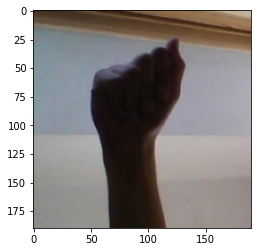

In [4]:
# load images and convert grayscale
# asl_alphabet_train\asl_alphabet_train\A
img = cv2.imread('asl_alphabet_train/asl_alphabet_train/A/A2.jpg') 
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgRGB = imgRGB[5:-5, 5:-5]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[5:-5, 5:-5]
plt.imshow(imgRGB,cmap='gray')

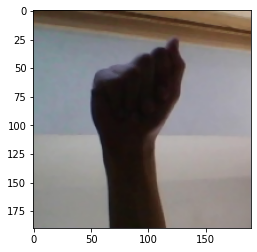

In [5]:
blur = cv2.medianBlur(imgRGB,3)
plt.imshow(blur)

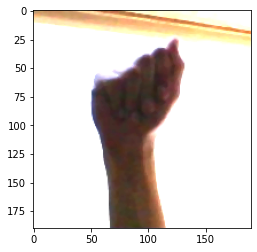

In [25]:
# Code Reference:
## https://stackoverflow.com/questions/52505906/find-if-image-is-bright-or-dark
## https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html

import numpy as np

#def img_estim(img, thrshld):

thrshld = 127
img = blur
is_light = np.mean(img) > thrshld
if not is_light:
    new_img = np.zeros(blur.shape, blur.dtype)

    contrast = 3
    bright = 2

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c]=np.clip(contrast*img[y,x,c]+bright, 0, 255)
else:
    new_img = img

plt.imshow(new_img)    

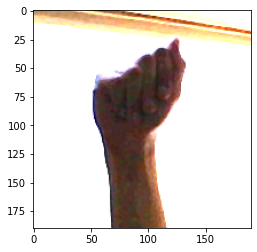

In [19]:
img_conv = new_img.astype('float32')
sm = cv2.blur(img_conv,(5,5))
details = img_conv - sm;
shp = img_conv + details;
shp = np.clip(np.float32(shp),0,255)
shp = shp.astype('uint8')

plt.imshow(shp)
plt.show()

# Code Reference:
## https://stackoverflow.com/questions/52505906/find-if-image-is-bright-or-dark
## https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html